In [10]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
with open('../data/static_dataset.pkl', 'rb') as f:
    df = pickle.load(f)

In [12]:
df.head(1)

gameDuration   gameCreation     gameVersion  mapId  queueId  patch  \
0          1399  1696332075689  13.19.533.1909     11      420     19   

   seasonId platformId  participant1_level participant1_tier  ...  \
0        13       EUW1                 865           DIAMOND  ...   

   participant10_champion_kills  participant10_champion_deaths  \
0                           1.3                            4.1   

   participant10_champion_assists  participant10_champion_lp  \
0                            15.6                      335.0   

   participant10_champion_maxKills  participant10_champion_cs  \
0                              9.0                       35.7   

   participant10_champion_damage  participant10_champion_gold  \
0                         7061.0                       7729.0   

   participant10_teamId  participant10_win  
0                   200              False  

[1 rows x 268 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13209 entries, 0 to 0
Columns: 268 entries, gameDuration to participant10_win
dtypes: bool(50), float64(50), int64(66), object(102)
memory usage: 22.7+ MB


In [14]:
df.describe()

gameDuration  gameCreation    mapId  queueId         patch  seasonId  \
count  13209.000000  1.320900e+04  13209.0  13209.0  13209.000000   13209.0   
mean    1609.356045  1.696395e+12     11.0    420.0     18.857521      13.0   
std      324.413750  5.007920e+08      0.0      0.0      0.349554       0.0   
min      960.000000  1.694587e+12     11.0    420.0     18.000000      13.0   
25%     1385.000000  1.696091e+12     11.0    420.0     19.000000      13.0   
50%     1584.000000  1.696533e+12     11.0    420.0     19.000000      13.0   
75%     1812.000000  1.696793e+12     11.0    420.0     19.000000      13.0   
max     3092.000000  1.696991e+12     11.0    420.0     19.000000      13.0   

       participant1_level  participant1_rank  participant1_leaguePoints  \
count        13209.000000       13209.000000               13209.000000   
mean           420.814369           1.354682                 311.962071   
std            303.562121           0.805761                 342.118429   
min             32.000000           1.000000                   0.000000   
25%            146.000000           1.000000                  41.000000   
50%            374.000000           1.000000                 144.000000   
75%            631.000000           1.000000                 560.000000   
max           1814.000000           4.000000                1652.000000   

       participant1_wins  ...  participant10_rank  participant10_leaguePoints  \
count       13209.000000  ...        13209.000000                13209.000000   
mean          134.573624  ...            1.367855                  348.122568   
std           111.750927  ...            0.842881                  367.778110   
min             0.000000  ...            1.000000                    0.000000   
25%            44.000000  ...            1.000000                   47.000000   
50%           110.000000  ...            1.000000                  192.000000   
75%           203.000000  ...            1.000000                  617.000000   
max           662.000000  ...            4.000000                 2040.000000   

       participant10_wins  participant10_losses  \
count        13209.000000          13209.000000   
mean           130.065864            114.281475   
std            105.674669             99.684387   
min              0.000000              0.000000   
25%             42.000000             32.000000   
50%            111.000000             92.000000   
75%            189.000000            170.000000   
max            665.000000            641.000000   

       participant10_champion_lastPlayTime  \
count                         1.132700e+04   
mean                          1.696778e+12   
std                           2.523919e+08   
min                           1.695578e+12   
25%                           1.696699e+12   
50%                           1.696868e+12   
75%                           1.696944e+12   
max                           1.697119e+12   

       participant10_champion_championLevel  \
count                          11327.000000   
mean                               5.601660   
std                                1.664535   
min                                1.000000   
25%                                5.000000   
50%                                6.000000   
75%                                7.000000   
max                                7.000000   

       participant10_champion_championPoints  \
count                           1.132700e+04   
mean                            3.155783e+05   
std                             6.258702e+05   
min                             1.080000e+02   
25%                             3.113400e+04   
50%                             9.801800e+04   
75%                             2.854825e+05   
max                             6.370571e+06   

       participant10_champion_championPointsSinceLastLevel  \
count                                       1.132700e+04     
mean                             

In [15]:
df.dtypes

gameDuration                      int64
gameCreation                      int64
gameVersion                      object
mapId                             int64
queueId                           int64
                                  ...  
participant10_champion_cs        object
participant10_champion_damage    object
participant10_champion_gold      object
participant10_teamId              int64
participant10_win                  bool
Length: 268, dtype: object

<Axes: >

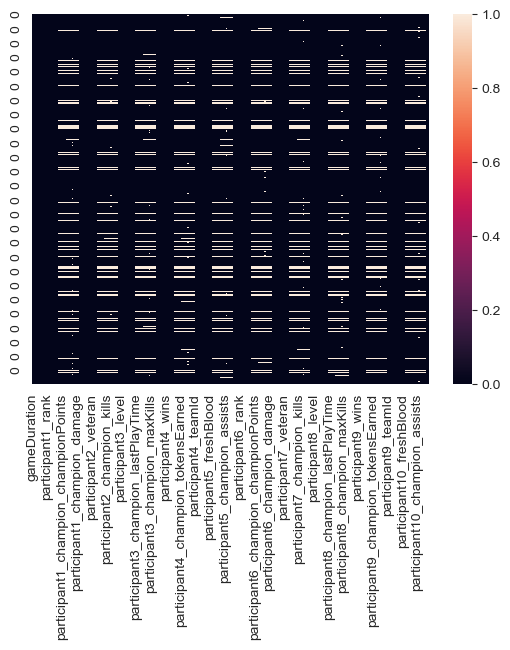

In [16]:
sns.heatmap(df.isna())

C:\Users\morit\AppData\Local\Temp\ipykernel_30132\1072140413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

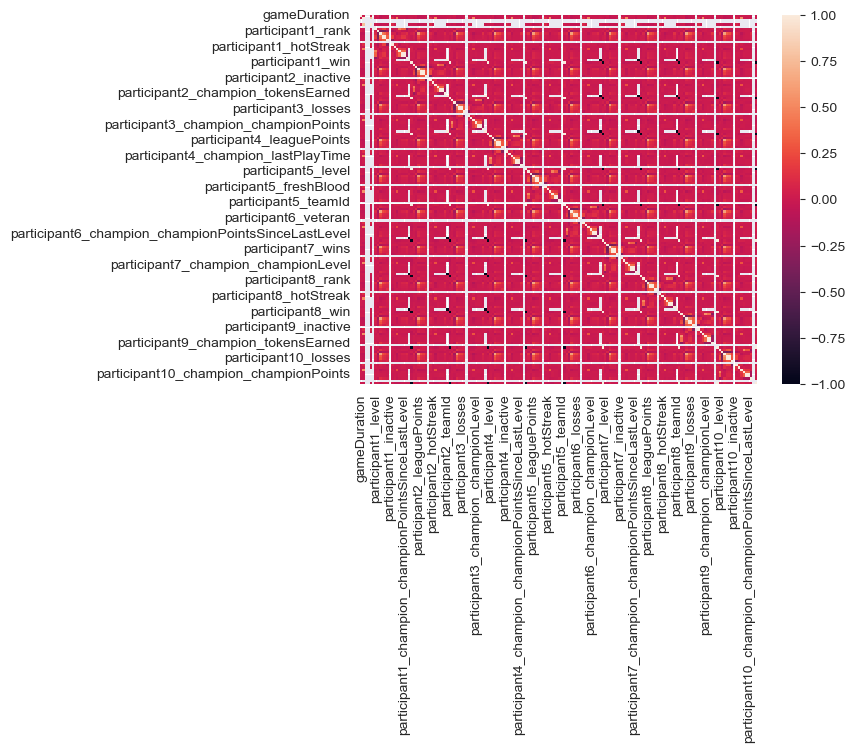

In [17]:
sns.heatmap(df.corr())

In [18]:
def drop_missing(df: pd.DataFrame):
    len_before = len(df)
    df.dropna(inplace=True, axis=0)
    print(f'dropped {len_before - len(df)} rows')

In [19]:
drop_missing(df)

dropped 5325 rows


the first 5 participants are always in the same team:

In [20]:
df['participant1_win'] == df['participant2_win']

0    True
0    True
0    True
0    True
0    True
     ... 
0    True
0    True
0    True
0    True
0    True
Length: 7884, dtype: bool

In [21]:
df.head()

gameDuration   gameCreation     gameVersion  mapId  queueId  patch  \
0          1399  1696332075689  13.19.533.1909     11      420     19   
0          1959  1696527472590  13.19.534.5972     11      420     19   
0          1653  1696008096161  13.19.533.1909     11      420     19   
0          1435  1696347033113  13.19.533.1909     11      420     19   
0          1460  1696269507611  13.19.533.1909     11      420     19   

   seasonId platformId  participant1_level participant1_tier  ...  \
0        13       EUW1                 865           DIAMOND  ...   
0        13       EUW1                 331           EMERALD  ...   
0        13       EUW1                 281           DIAMOND  ...   
0        13       EUW1                 115            MASTER  ...   
0        13       EUW1                 921       GRANDMASTER  ...   

   participant10_champion_kills  participant10_champion_deaths  \
0                           1.3                            4.1   
0                           2.3                            4.1   
0                           0.8                            5.4   
0                           2.1                            3.4   
0                           1.3                            5.5   

   participant10_champion_assists  participant10_champion_lp  \
0                            15.6                      335.0   
0                            17.4                      128.0   
0                            13.6                      109.0   
0                            14.6                       91.0   
0                            13.1                       80.0   

   participant10_champion_maxKills  participant10_champion_cs  \
0                              9.0                       35.7   
0                             11.0                       19.8   
0                             11.0                       29.0   
0                              6.0                       31.8   
0                             12.0                       25.3   

   participant10_champion_damage  participant10_champion_gold  \
0                         7061.0                       7729.0   
0                        11049.0                       9054.0   
0                         6262.0                       6489.0   
0                         7237.0                       7544.0   
0                         5886.0                       6349.0   

   participant10_teamId  participant10_win  
0                   200              False  
0                   200               True  
0                   200               True  
0                   200               True  
0                   200              False  

[5 rows x 268 columns]

In [22]:
def get_winning_team(df: pd.DataFrame):
    df['label'] = np.where(df['participant1_win'], 0, 1)  # 0 = team1 won, 1 = team2 won 

In [23]:
get_winning_team(df)

In [24]:
def drop_wrong_data(df: pd.DataFrame):
    len_before = len(df)
    df.drop(df[df['mapId'] != 11].index, inplace=True)
    df.drop(df[df['queueId'] != 420].index, inplace=True)
    df.drop(df[df['gameDuration'] < 900].index, inplace=True)
    df.drop(df[df['platformId'] != 'EUW1'].index, inplace=True)
    df.drop(df[df['seasonId'] != 13].index, inplace=True)
    df.drop(df[df['gameVersion'] != df['gameVersion'][0]].index, inplace=True)
    df.drop(df[df['patch'] != df['patch'][0]].index, inplace=True)
    print(f'dropped {len_before - len(df)} rows')

In [25]:
df

gameDuration   gameCreation     gameVersion  mapId  queueId  patch  \
0           1399  1696332075689  13.19.533.1909     11      420     19   
0           1959  1696527472590  13.19.534.5972     11      420     19   
0           1653  1696008096161  13.19.533.1909     11      420     19   
0           1435  1696347033113  13.19.533.1909     11      420     19   
0           1460  1696269507611  13.19.533.1909     11      420     19   
..           ...            ...             ...    ...      ...    ...   
0           1707  1696268326924  13.19.533.1909     11      420     19   
0           2082  1696085131782  13.19.533.1909     11      420     19   
0           2008  1696269603650  13.19.533.1909     11      420     19   
0           1465  1696779475245  13.19.534.5972     11      420     19   
0           1502  1696266136300  13.19.533.1909     11      420     19   

    seasonId platformId  participant1_level participant1_tier  ...  \
0         13       EUW1                 865           DIAMOND  ...   
0         13       EUW1                 331           EMERALD  ...   
0         13       EUW1                 281           DIAMOND  ...   
0         13       EUW1                 115            MASTER  ...   
0         13       EUW1                 921       GRANDMASTER  ...   
..       ...        ...                 ...               ...  ...   
0         13       EUW1                  98            MASTER  ...   
0         13       EUW1                1016           DIAMOND  ...   
0         13       EUW1                 416       GRANDMASTER  ...   
0         13       EUW1                 374           DIAMOND  ...   
0         13       EUW1                 443           DIAMOND  ...   

    participant10_champion_deaths  participant10_champion_assists  \
0                             4.1                            15.6   
0                             4.1                            17.4   
0                             5.4                            13.6   
0                             3.4                            14.6   
0                             5.5                            13.1   
..                            ...                             ...   
0                             5.5                            15.5   
0                             5.1                            14.5   
0                             4.6                             8.1   
0                             5.6                            13.5   
0                             7.8                            11.4   

    participant10_champion_lp  participant10_champion_maxKills  \
0                       335.0                              9.0   
0                       128.0                             11.0   
0                       109.0                             11.0   
0                        91.0                              6.0   
0                        80.0                             12.0   
..                        ...                              ...   
0                           2                                6   
0                         158                               15   
0                          86                                8   
0                         244                               14   
0                         168                               16   

    participant10_champion_cs  participant10_champion_damage  \
0                        35.7                         7061.0   
0                        19.8                        11049.0   
0                        29.0                         6262.0   
0                        31.8                         7237.0   
0                        25.3                         5886.0   
..                        ...                            ...   
0                         6.5                         7955.0   
0                        14.3                        11510.0   
0                       202.9                        19316.0   
0           

In [26]:
drop_wrong_data(df)

dropped 0 rows


In [27]:
def drop_irrelevant(df: pd.DataFrame):
    irrelevant_cols = ['gameDuration', 'gameCreation', 'gameVersion', 'mapId', 'queueId', 'patch', 'seasonId',
                       'platformId']
    for i in range(1, 11):
        irrelevant_cols.append(f'participant{i}_win')
    df.drop(columns=irrelevant_cols, inplace=True)


In [28]:
drop_irrelevant(df)

In [29]:
df.reset_index(inplace=True, drop=True)
df

participant1_level participant1_tier  participant1_rank  \
0                    865           DIAMOND                  1   
1                    331           EMERALD                  4   
2                    281           DIAMOND                  1   
3                    115            MASTER                  1   
4                    921       GRANDMASTER                  1   
...                  ...               ...                ...   
7879                  98            MASTER                  1   
7880                1016           DIAMOND                  1   
7881                 416       GRANDMASTER                  1   
7882                 374           DIAMOND                  4   
7883                 443           DIAMOND                  1   

      participant1_leaguePoints  participant1_wins  participant1_losses  \
0                            19                205                  214   
1                            81                 29                   15   
2                            75                 28                   17   
3                            61                123                  118   
4                           827                219                  196   
...                         ...                ...                  ...   
7879                        204                 57                   42   
7880                         23                 81                   76   
7881                        833                 87                   62   
7882                         37                 35                   30   
7883                          0                 64                   72   

      participant1_veteran  participant1_inactive  participant1_freshBlood  \
0                    False                  False                     True   
1                    False                  False                    False   
2                    False                  False                     True   
3                    False                  False                    False   
4                    False                  False                    False   
...                    ...                    ...                      ...   
7879                 False                  False                    False   
7880                 False                  False                     True   
7881                 False                  False                    False   
7882                 False                  False                    False   
7883                 False                  False                    False   

      participant1_hotStreak  ...  participant10_champion_kills  \
0                       True  ...                           1.3   
1                      False  ...                           2.3   
2                      False  ...                           0.8   
3                      False  ...                           2.1   
4                      False  ...                           1.3   
...                      ...  ...                           ...   
7879                   False  ...                           0.0   
7880                   False  ...                           2.5   
7881                   False  ...                           6.0   
7882                   False  ...                           1.6   
7883                   False  ...                           2.7   

      participant10_champion_deaths  participant10_champion_assists  \
0                               4.1                            15.6   
1                               4.1                            17.4   
2                               5.4                            13.6   
3                               3.4                            14.6   
4                               5.5                            13.1   
...                             ...                             ...   
7879                            5.5                            15.5   
7880          

In [30]:
from enum import Enum


class Rank(Enum):
    IRON = 0
    BRONZE = 1
    SILVER = 2
    GOLD = 3
    PLATINUM = 4
    EMERALD = 5
    DIAMOND = 6
    MASTER = 7
    GRANDMASTER = 8
    CHALLENGER = 9


def format_rank(tier: str, rank: str) -> str:
    return f'{tier}.{rank}'


def fix_rank(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_tier'] = df[f'participant{i}_tier'].apply(lambda x: Rank[x].value)
        df.loc[:, f'participant{i}_tier'] = df.apply(
            lambda x: format_rank(x[f'participant{i}_tier'], x[f'participant{i}_rank']), axis=1)
        df[f'participant{i}_tier'] = df[f'participant{i}_tier'].astype(float)
        df.drop(columns=[f'participant{i}_rank'], inplace=True)

In [31]:
fix_rank(df)
df

participant1_level  participant1_tier  participant1_leaguePoints  \
0                    865                6.1                         19   
1                    331                5.4                         81   
2                    281                6.1                         75   
3                    115                7.1                         61   
4                    921                8.1                        827   
...                  ...                ...                        ...   
7879                  98                7.1                        204   
7880                1016                6.1                         23   
7881                 416                8.1                        833   
7882                 374                6.4                         37   
7883                 443                6.1                          0   

      participant1_wins  participant1_losses  participant1_veteran  \
0                   205                  214                 False   
1                    29                   15                 False   
2                    28                   17                 False   
3                   123                  118                 False   
4                   219                  196                 False   
...                 ...                  ...                   ...   
7879                 57                   42                 False   
7880                 81                   76                 False   
7881                 87                   62                 False   
7882                 35                   30                 False   
7883                 64                   72                 False   

      participant1_inactive  participant1_freshBlood  participant1_hotStreak  \
0                     False                     True                    True   
1                     False                    False                   False   
2                     False                     True                   False   
3                     False                    False                   False   
4                     False                    False                   False   
...                     ...                      ...                     ...   
7879                  False                    False                   False   
7880                  False                     True                   False   
7881                  False                    False                   False   
7882                  False                    False                   False   
7883                  False                    False                   False   

      participant1_champion_lastPlayTime  ...  participant10_champion_kills  \
0                           1.697032e+12  ...                           1.3   
1                           1.696942e+12  ...                           2.3   
2                           1.696672e+12  ...                           0.8   
3                           1.697045e+12  ...                           2.1   
4                           1.696685e+12  ...                           1.3   
...                                  ...  ...                           ...   
7879                        1.696511e+12  ...                           0.0   
7880                        1.696951e+12  ...                           2.5   
7881                        1.696681e+12  ...                           6.0   
7882                        1.696858e+12  ...                           1.6   
7883                        1.696526e+12  ...                           2.7   

      participant10_champion_deaths  participant10_champion_assists  \
0                               4.1                            15.6   
1                               4.1                            17.4   
2                               5.4                            13.6   
3                               3.4                            14.6   
4          

In [32]:
def calc_winrate(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_winrate'] = df[f'participant{i}_wins'] / (
                df[f'participant{i}_wins'] + df[f'participant{i}_losses'])
        df.drop(columns=[f'participant{i}_wins', f'participant{i}_losses'], inplace=True)

In [33]:
calc_winrate(df)
df

participant1_level  participant1_tier  participant1_leaguePoints  \
0                    865                6.1                         19   
1                    331                5.4                         81   
2                    281                6.1                         75   
3                    115                7.1                         61   
4                    921                8.1                        827   
...                  ...                ...                        ...   
7879                  98                7.1                        204   
7880                1016                6.1                         23   
7881                 416                8.1                        833   
7882                 374                6.4                         37   
7883                 443                6.1                          0   

      participant1_veteran  participant1_inactive  participant1_freshBlood  \
0                    False                  False                     True   
1                    False                  False                    False   
2                    False                  False                     True   
3                    False                  False                    False   
4                    False                  False                    False   
...                    ...                    ...                      ...   
7879                 False                  False                    False   
7880                 False                  False                     True   
7881                 False                  False                    False   
7882                 False                  False                    False   
7883                 False                  False                    False   

      participant1_hotStreak  participant1_champion_lastPlayTime  \
0                       True                        1.697032e+12   
1                      False                        1.696942e+12   
2                      False                        1.696672e+12   
3                      False                        1.697045e+12   
4                      False                        1.696685e+12   
...                      ...                                 ...   
7879                   False                        1.696511e+12   
7880                   False                        1.696951e+12   
7881                   False                        1.696681e+12   
7882                   False                        1.696858e+12   
7883                   False                        1.696526e+12   

      participant1_champion_championLevel  \
0                                     7.0   
1                                     7.0   
2                                     7.0   
3                                     7.0   
4                                     7.0   
...                                   ...   
7879                                  7.0   
7880                                  7.0   
7881                                  5.0   
7882                                  7.0   
7883                                  7.0   

      participant1_champion_championPoints  ...  participant1_winrate  \
0                                2212038.0  ...              0.489260   
1                                  53855.0  ...              0.659091   
2                                 348367.0  ...              0.622222   
3                                 571764.0  ...              0.510373   
4                                4545807.0  ...              0.527711   
...                                    ...  ...                   ...   
7879                              122846.0  ...              0.575758   
7880                             3730758.0  ...              0.515924   
7881                               53047.0  ...              0.583893   
7882                              403421.0  ...              0.538462   
7883               

In [34]:
cols = df.columns.tolist()
index = cols.index('label')
cols = cols[:index] + cols[index + 1:] + [cols[index]]  # label as last column
df = df[cols]

In [35]:
def fix_teamId(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_teamId'] = df[f'participant{i}_teamId'] // 100 - 1

In [36]:
fix_teamId(df)
df

participant1_level  participant1_tier  participant1_leaguePoints  \
0                    865                6.1                         19   
1                    331                5.4                         81   
2                    281                6.1                         75   
3                    115                7.1                         61   
4                    921                8.1                        827   
...                  ...                ...                        ...   
7879                  98                7.1                        204   
7880                1016                6.1                         23   
7881                 416                8.1                        833   
7882                 374                6.4                         37   
7883                 443                6.1                          0   

      participant1_veteran  participant1_inactive  participant1_freshBlood  \
0                    False                  False                     True   
1                    False                  False                    False   
2                    False                  False                     True   
3                    False                  False                    False   
4                    False                  False                    False   
...                    ...                    ...                      ...   
7879                 False                  False                    False   
7880                 False                  False                     True   
7881                 False                  False                    False   
7882                 False                  False                    False   
7883                 False                  False                    False   

      participant1_hotStreak  participant1_champion_lastPlayTime  \
0                       True                        1.697032e+12   
1                      False                        1.696942e+12   
2                      False                        1.696672e+12   
3                      False                        1.697045e+12   
4                      False                        1.696685e+12   
...                      ...                                 ...   
7879                   False                        1.696511e+12   
7880                   False                        1.696951e+12   
7881                   False                        1.696681e+12   
7882                   False                        1.696858e+12   
7883                   False                        1.696526e+12   

      participant1_champion_championLevel  \
0                                     7.0   
1                                     7.0   
2                                     7.0   
3                                     7.0   
4                                     7.0   
...                                   ...   
7879                                  7.0   
7880                                  7.0   
7881                                  5.0   
7882                                  7.0   
7883                                  7.0   

      participant1_champion_championPoints  ...  participant2_winrate  \
0                                2212038.0  ...              0.555556   
1                                  53855.0  ...              0.603306   
2                                 348367.0  ...              0.524715   
3                                 571764.0  ...              0.639175   
4                                4545807.0  ...              0.583333   
...                                    ...  ...                   ...   
7879                              122846.0  ...              0.496894   
7880                             3730758.0  ...              0.535714   
7881                               53047.0  ...              0.510736   
7882                              403421.0  ...              0.571429   
7883               

In [37]:
def convert_booleans(df: pd.DataFrame):
    df.replace({True: 1, False: 0}, inplace=True)

In [38]:
convert_booleans(df)
df

participant1_level  participant1_tier  participant1_leaguePoints  \
0                    865                6.1                         19   
1                    331                5.4                         81   
2                    281                6.1                         75   
3                    115                7.1                         61   
4                    921                8.1                        827   
...                  ...                ...                        ...   
7879                  98                7.1                        204   
7880                1016                6.1                         23   
7881                 416                8.1                        833   
7882                 374                6.4                         37   
7883                 443                6.1                          0   

      participant1_veteran  participant1_inactive  participant1_freshBlood  \
0                        0                      0                        1   
1                        0                      0                        0   
2                        0                      0                        1   
3                        0                      0                        0   
4                        0                      0                        0   
...                    ...                    ...                      ...   
7879                     0                      0                        0   
7880                     0                      0                        1   
7881                     0                      0                        0   
7882                     0                      0                        0   
7883                     0                      0                        0   

      participant1_hotStreak  participant1_champion_lastPlayTime  \
0                          1                        1.697032e+12   
1                          0                        1.696942e+12   
2                          0                        1.696672e+12   
3                          0                        1.697045e+12   
4                          0                        1.696685e+12   
...                      ...                                 ...   
7879                       0                        1.696511e+12   
7880                       0                        1.696951e+12   
7881                       0                        1.696681e+12   
7882                       0                        1.696858e+12   
7883                       0                        1.696526e+12   

      participant1_champion_championLevel  \
0                                     7.0   
1                                     7.0   
2                                     7.0   
3                                     7.0   
4                                     7.0   
...                                   ...   
7879                                  7.0   
7880                                  7.0   
7881                                  5.0   
7882                                  7.0   
7883                                  7.0   

      participant1_champion_championPoints  ...  participant2_winrate  \
0                                2212038.0  ...              0.555556   
1                                  53855.0  ...              0.603306   
2                                 348367.0  ...              0.524715   
3                                 571764.0  ...              0.639175   
4                                4545807.0  ...              0.583333   
...                                    ...  ...                   ...   
7879                              122846.0  ...              0.496894   
7880                             3730758.0  ...              0.535714   
7881                               53047.0  ...              0.510736   
7882                              403421.0  ...              0.571429   
7883               

In [39]:
from datetime import datetime


def convert_lastPlayTime(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_champion_lastPlayTime'] = df[f'participant{i}_champion_lastPlayTime'].apply(
            lambda x: int((datetime.now() - datetime.fromtimestamp(x / 1000)).total_seconds()))

In [40]:
convert_lastPlayTime(df)
df

participant1_level  participant1_tier  participant1_leaguePoints  \
0                    865                6.1                         19   
1                    331                5.4                         81   
2                    281                6.1                         75   
3                    115                7.1                         61   
4                    921                8.1                        827   
...                  ...                ...                        ...   
7879                  98                7.1                        204   
7880                1016                6.1                         23   
7881                 416                8.1                        833   
7882                 374                6.4                         37   
7883                 443                6.1                          0   

      participant1_veteran  participant1_inactive  participant1_freshBlood  \
0                        0                      0                        1   
1                        0                      0                        0   
2                        0                      0                        1   
3                        0                      0                        0   
4                        0                      0                        0   
...                    ...                    ...                      ...   
7879                     0                      0                        0   
7880                     0                      0                        1   
7881                     0                      0                        0   
7882                     0                      0                        0   
7883                     0                      0                        0   

      participant1_hotStreak  participant1_champion_lastPlayTime  \
0                          1                              150121   
1                          0                              240173   
2                          0                              509885   
3                          0                              136909   
4                          0                              497034   
...                      ...                                 ...   
7879                       0                              671082   
7880                       0                              231060   
7881                       0                              500600   
7882                       0                              323702   
7883                       0                              655941   

      participant1_champion_championLevel  \
0                                     7.0   
1                                     7.0   
2                                     7.0   
3                                     7.0   
4                                     7.0   
...                                   ...   
7879                                  7.0   
7880                                  7.0   
7881                                  5.0   
7882                                  7.0   
7883                                  7.0   

      participant1_champion_championPoints  ...  participant2_winrate  \
0                                2212038.0  ...              0.555556   
1                                  53855.0  ...              0.603306   
2                                 348367.0  ...              0.524715   
3                                 571764.0  ...              0.639175   
4                                4545807.0  ...              0.583333   
...                                    ...  ...                   ...   
7879                              122846.0  ...              0.496894   
7880                             3730758.0  ...              0.535714   
7881                               53047.0  ...              0.510736   
7882                              403421.0  ...              0.571429   
7883               

C:\Users\morit\AppData\Local\Temp\ipykernel_30132\3660722735.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


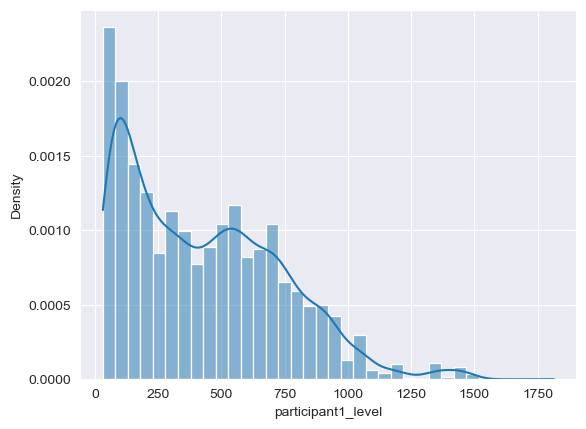

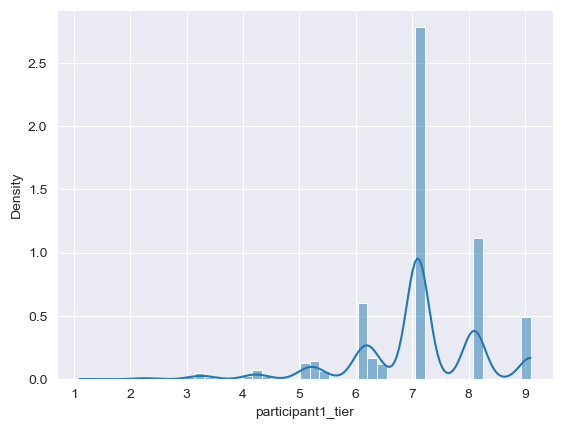

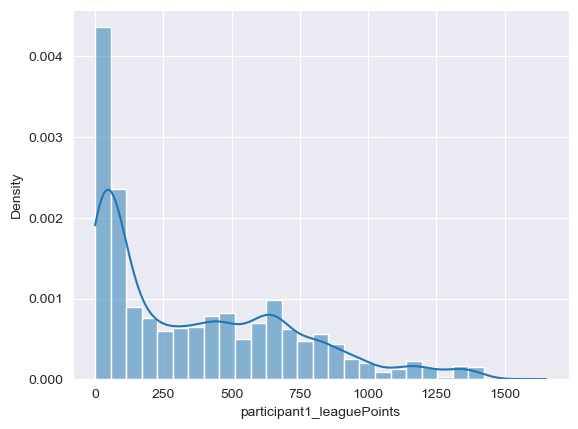

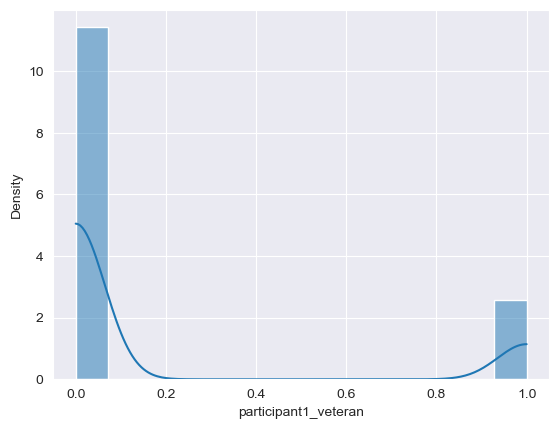

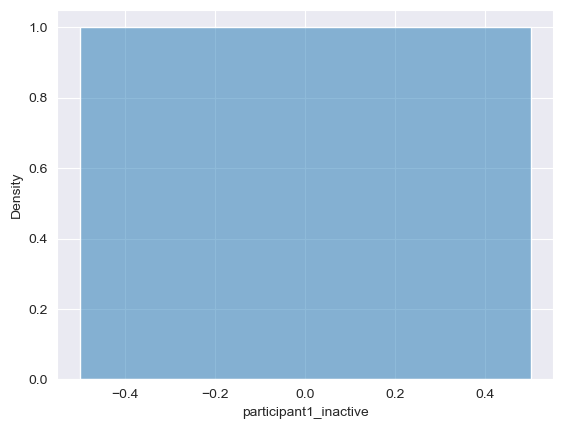

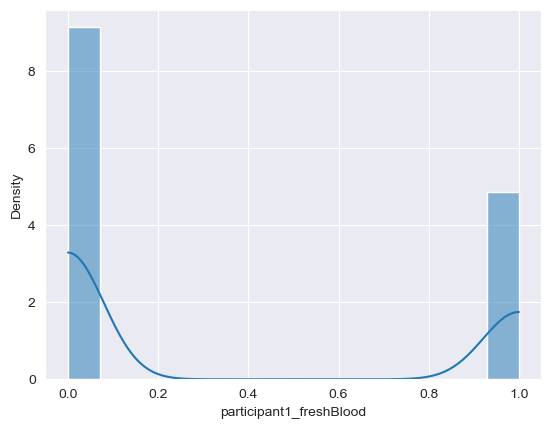

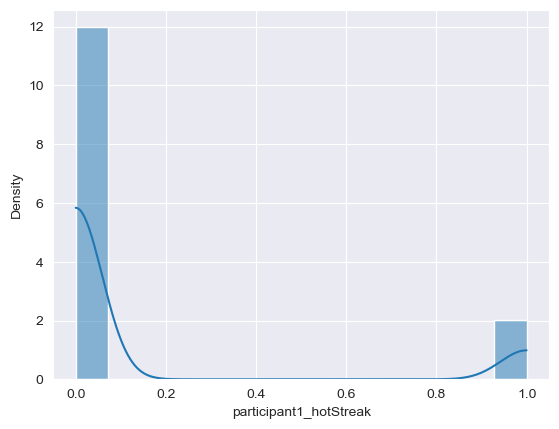

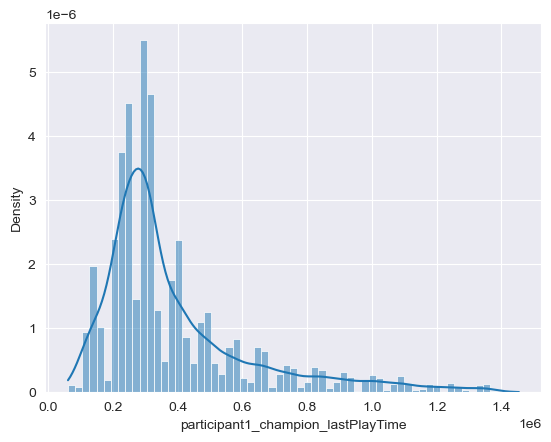

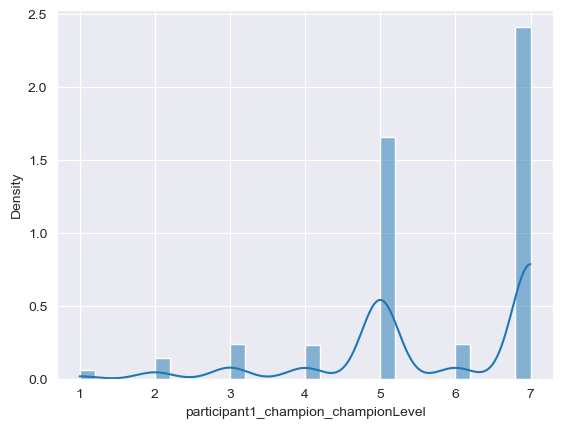

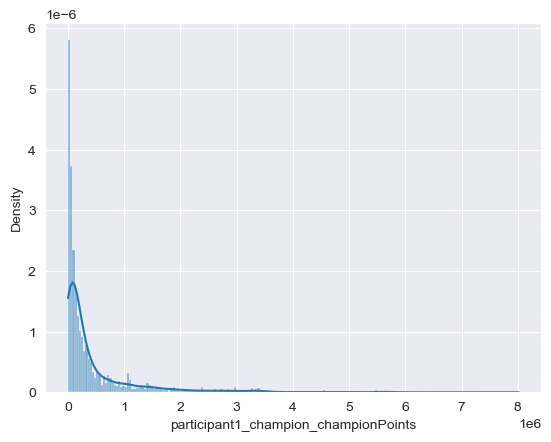

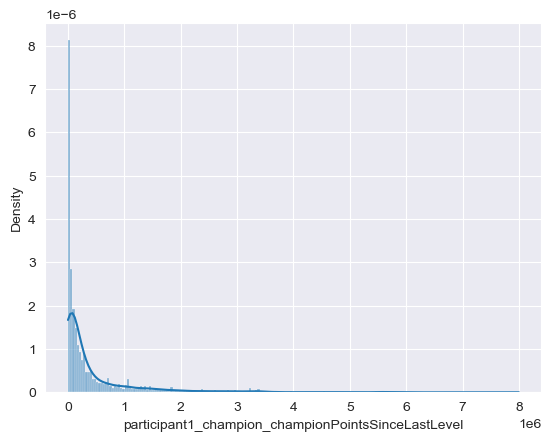

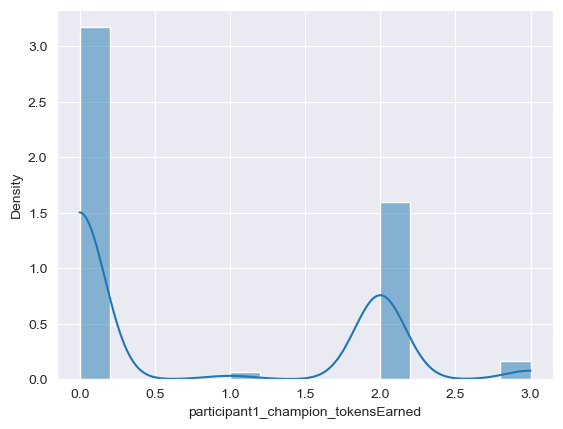

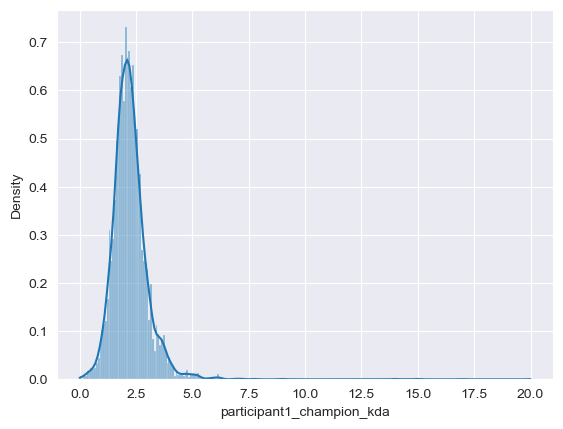

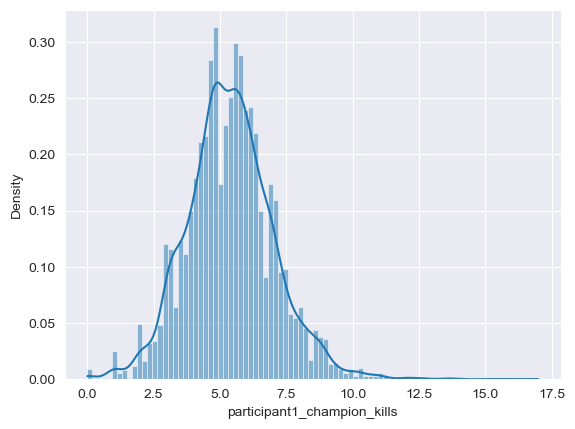

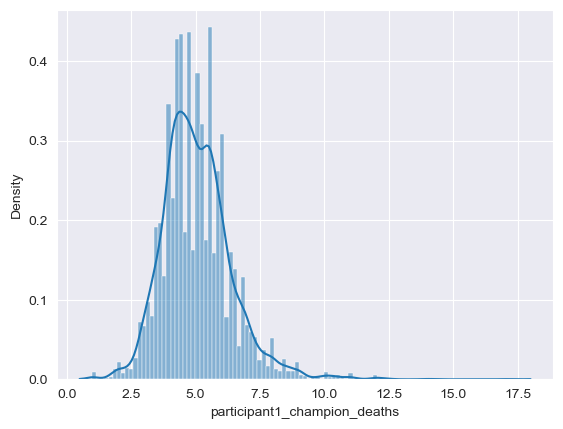

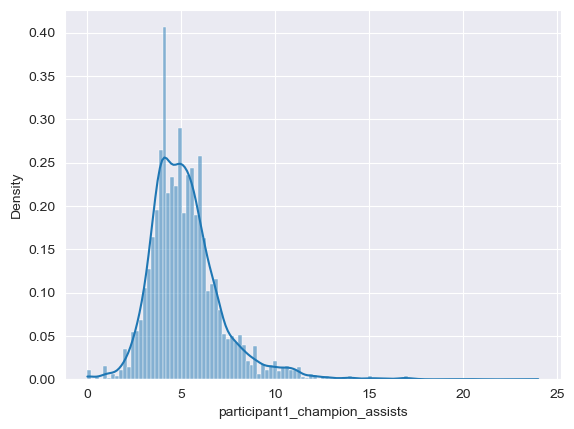

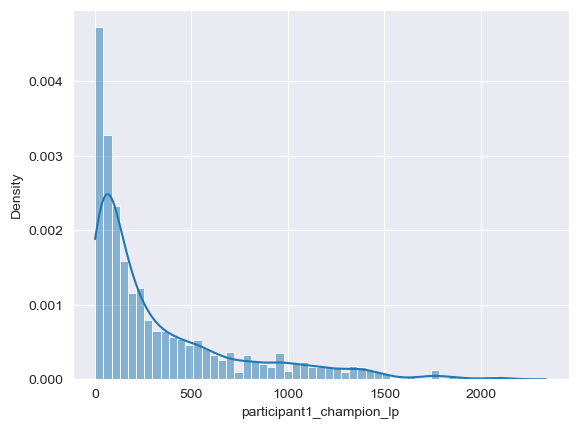

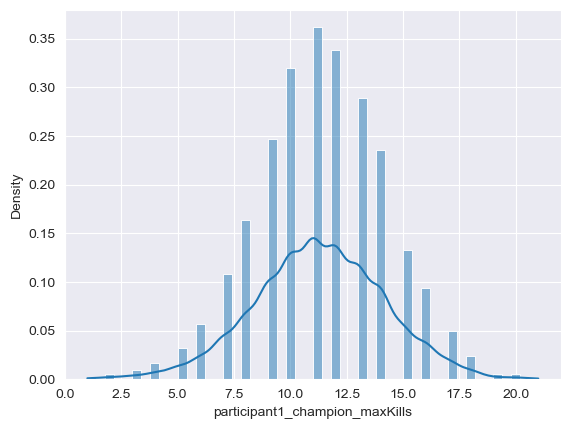

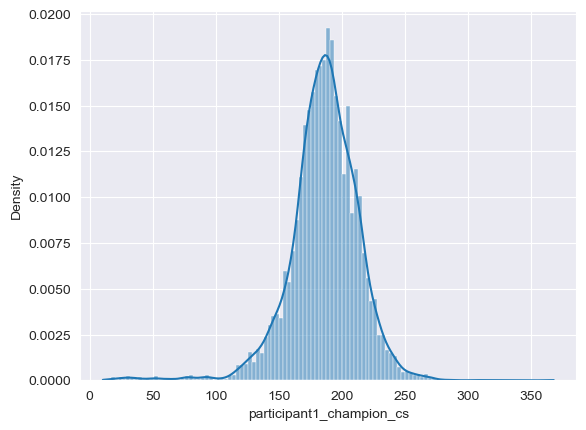

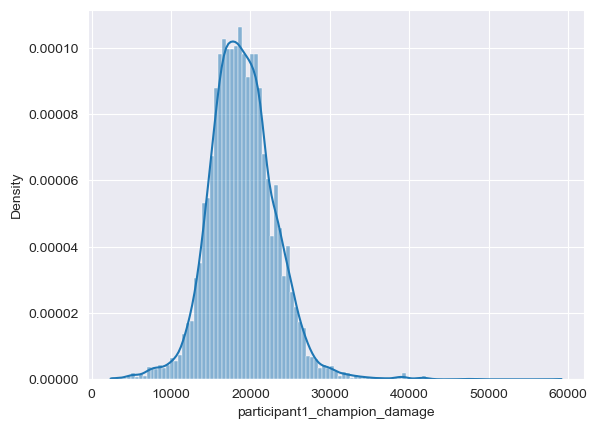

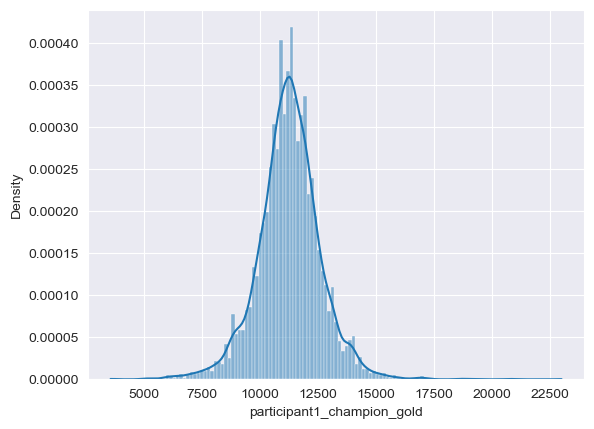

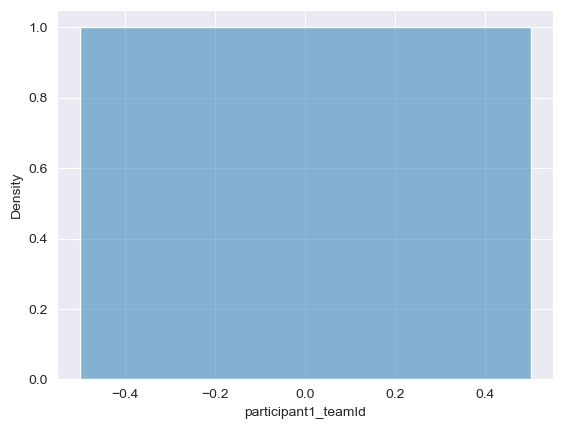

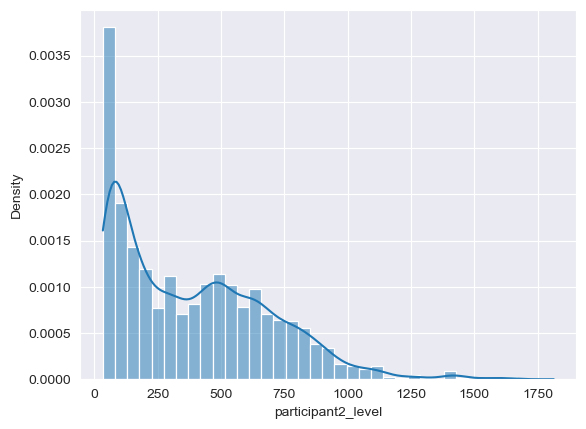

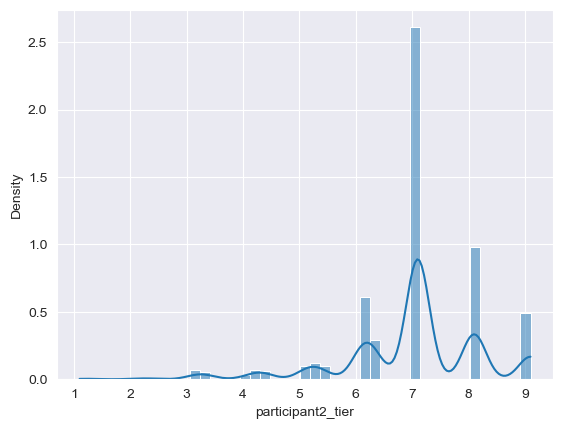

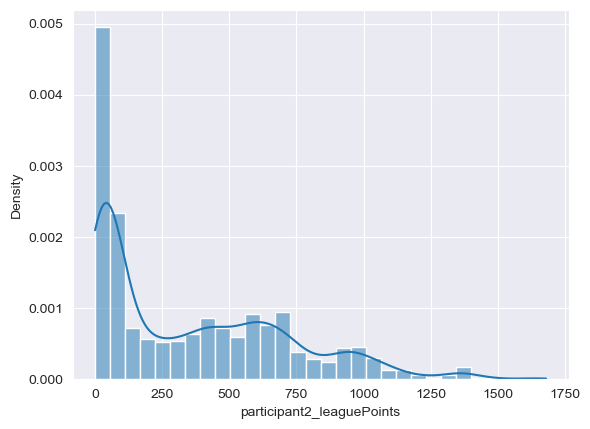

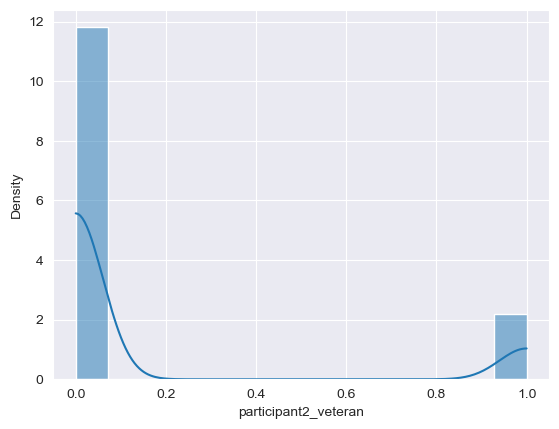

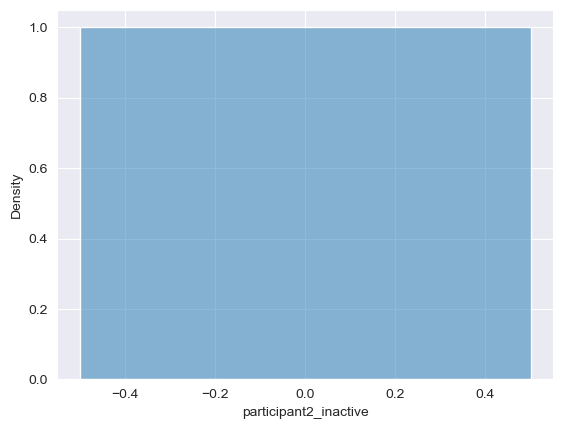

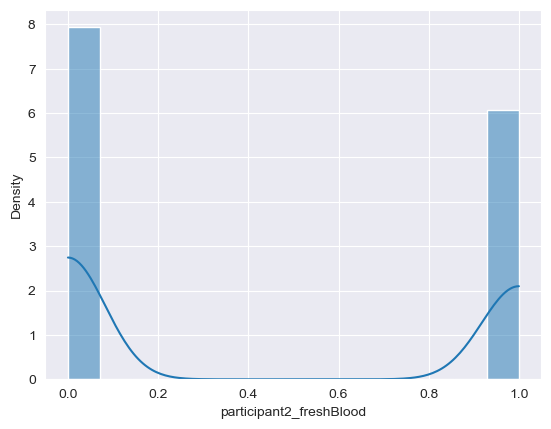

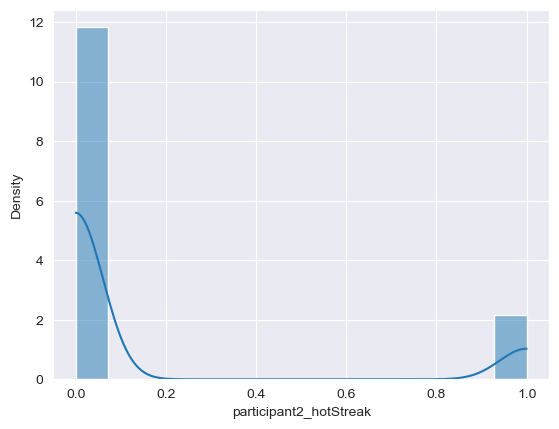

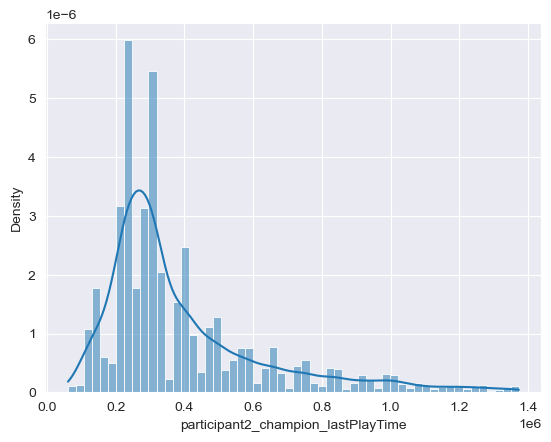

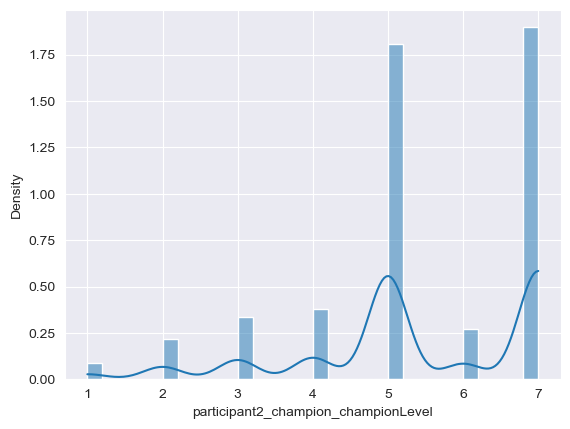

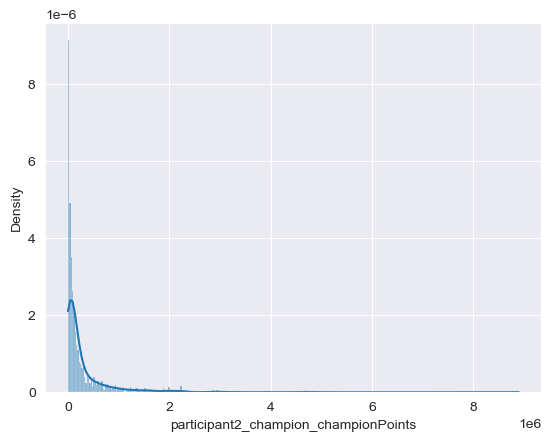

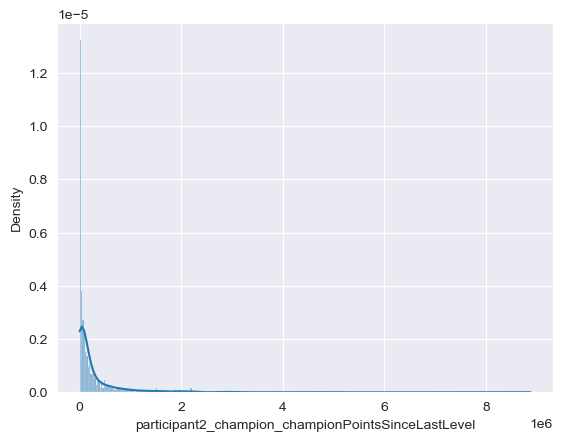

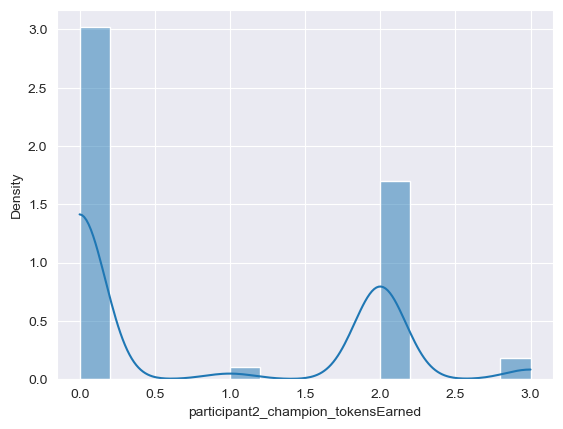

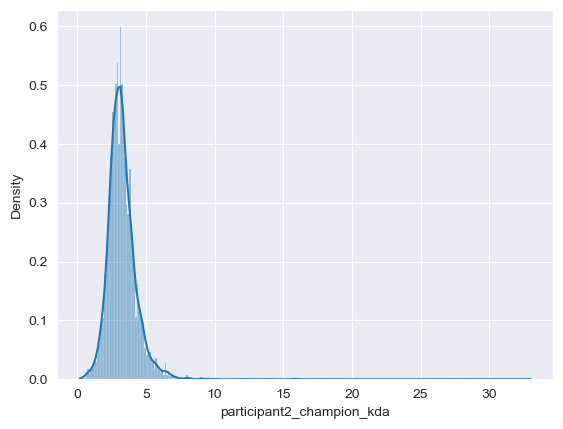

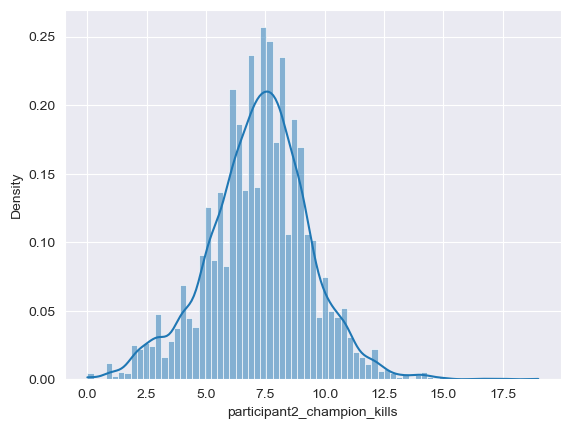

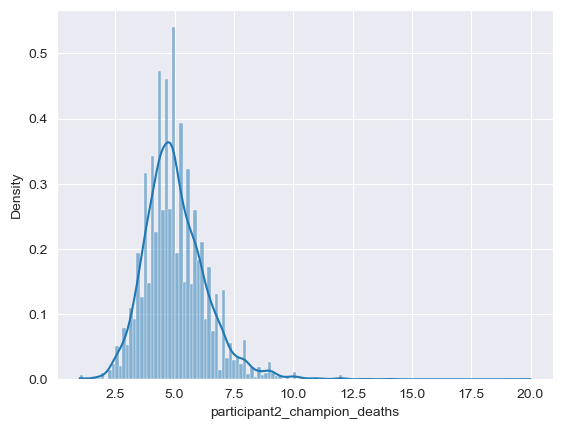

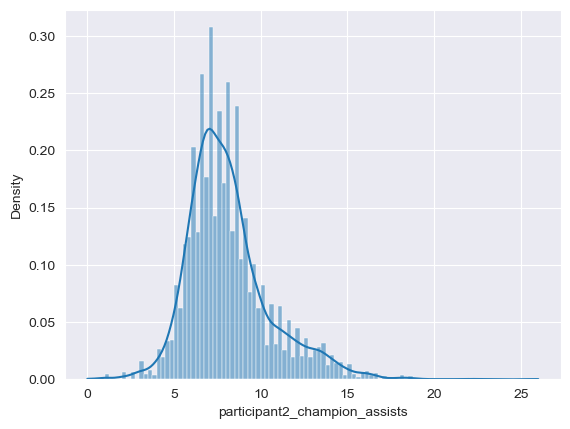

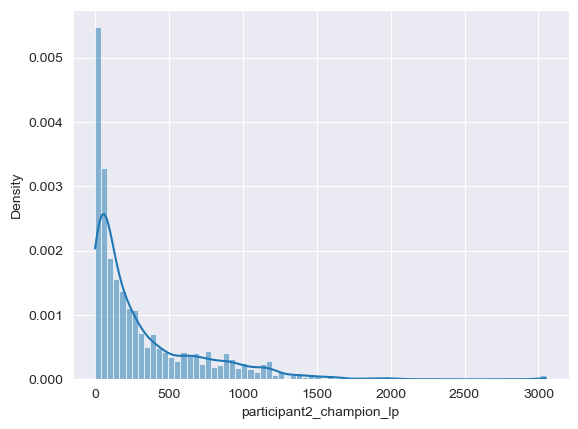

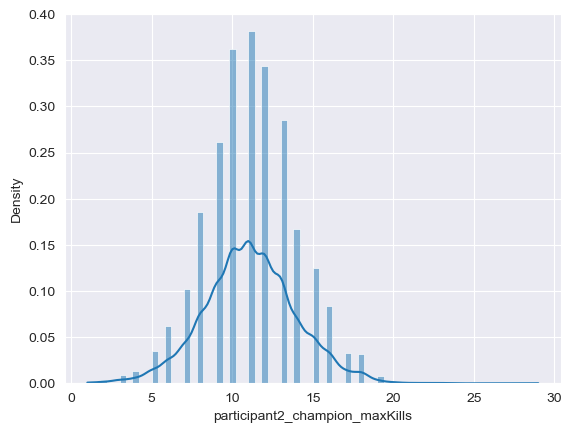

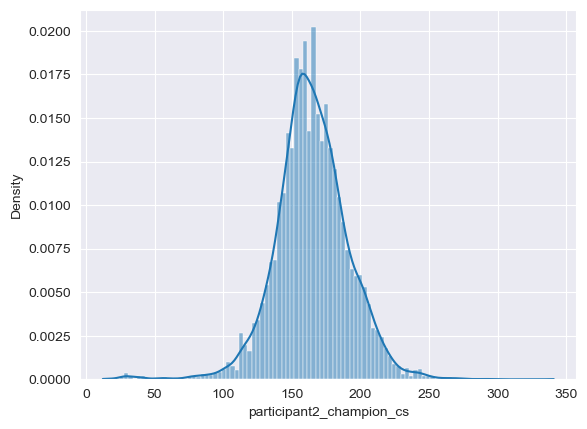

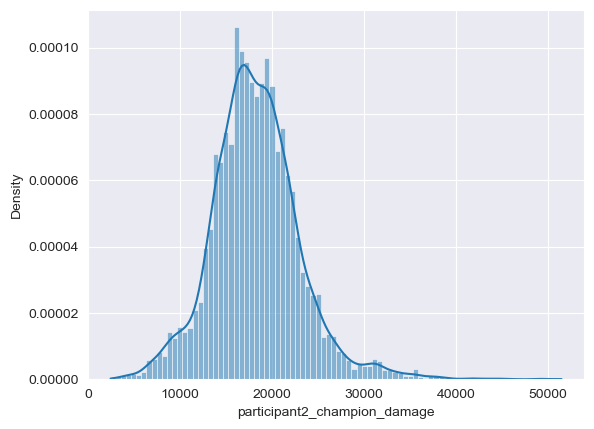

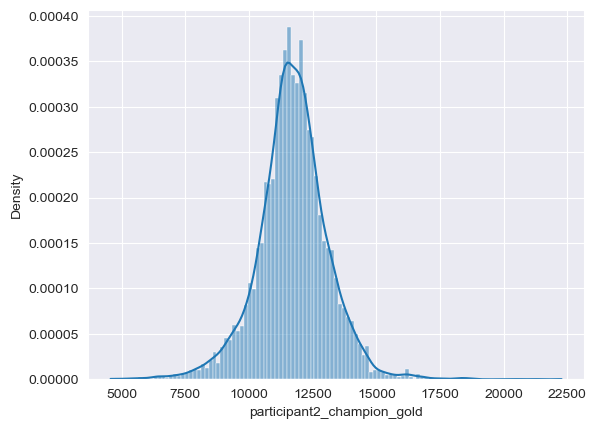

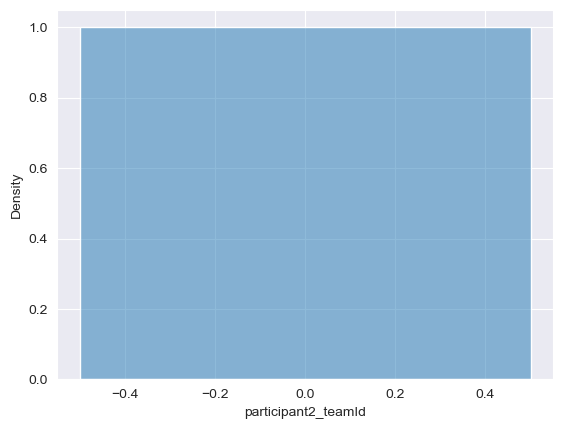

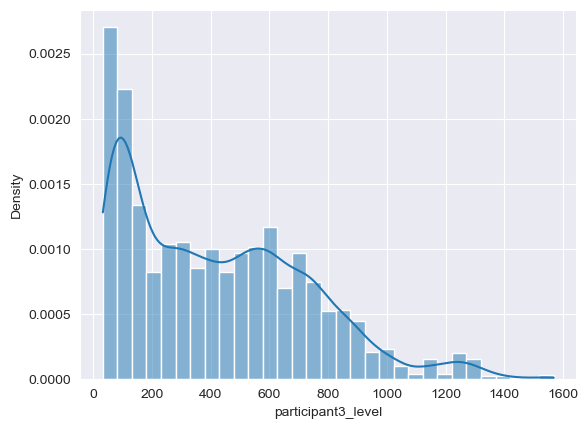

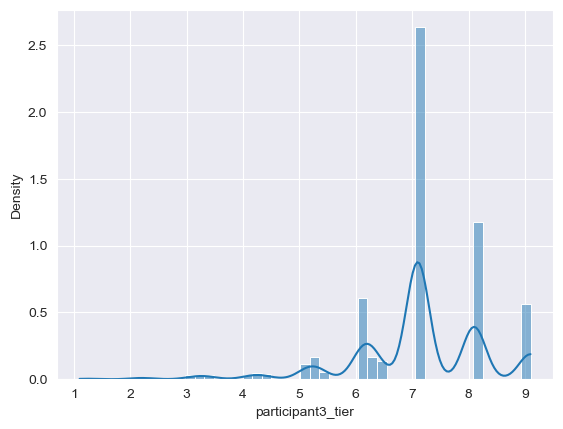

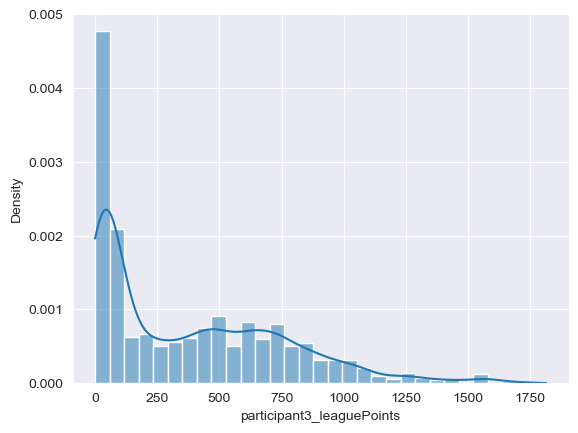

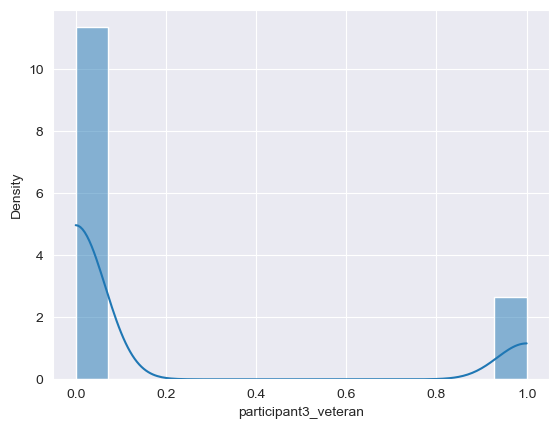

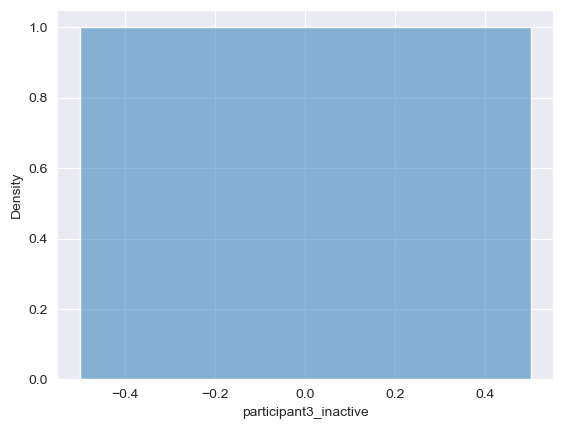

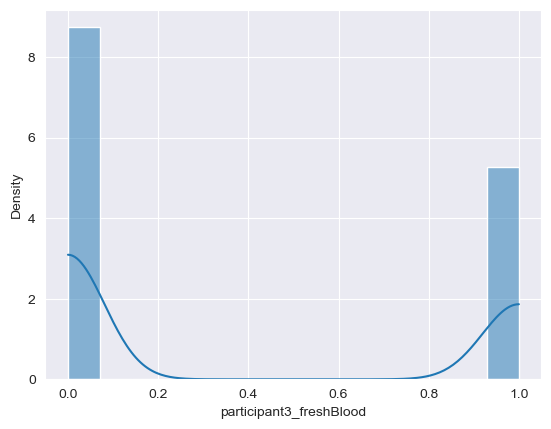

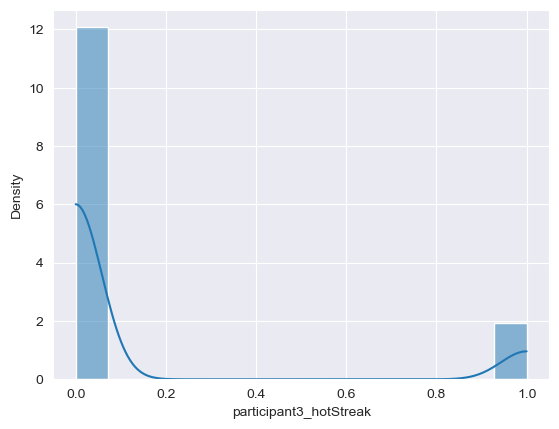

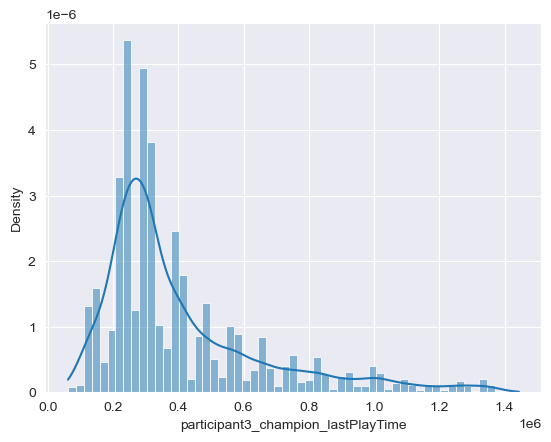

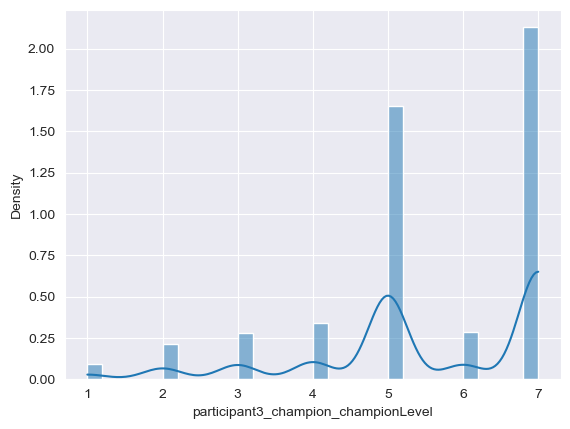

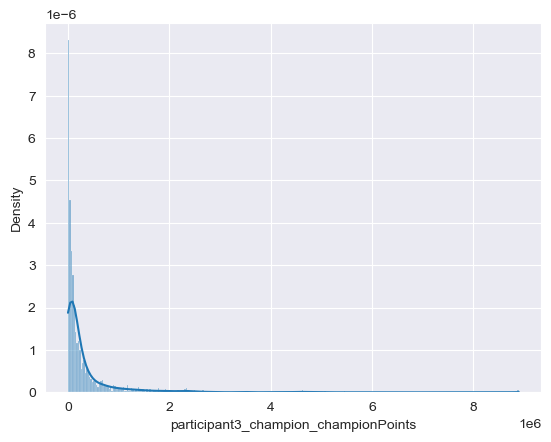

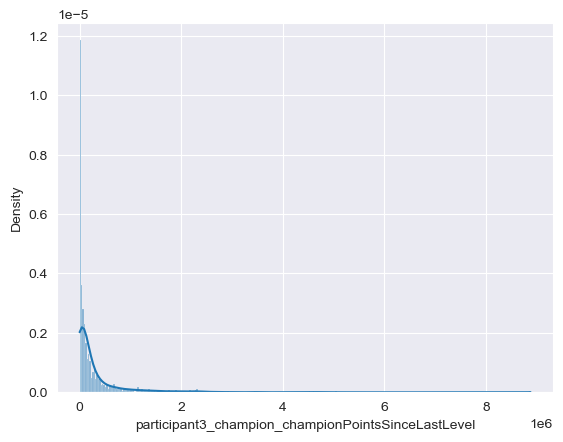

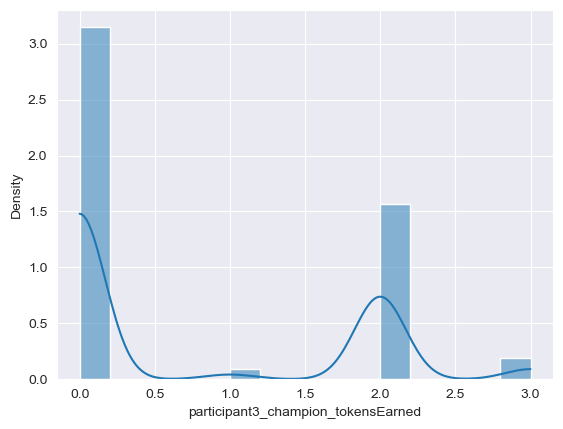

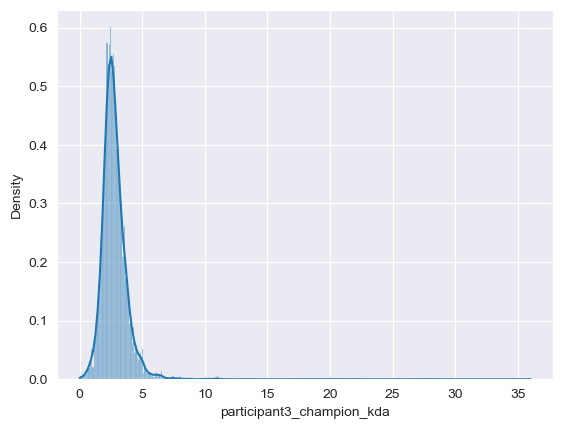

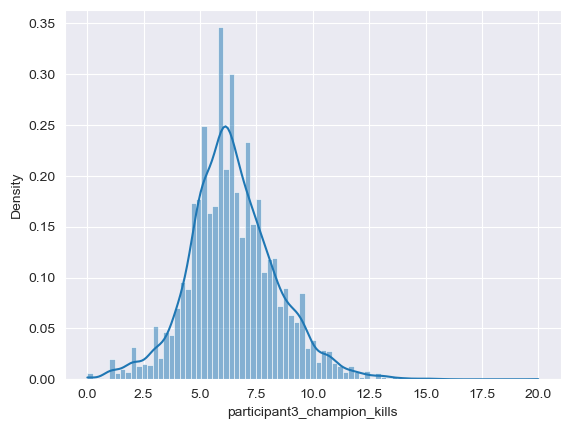

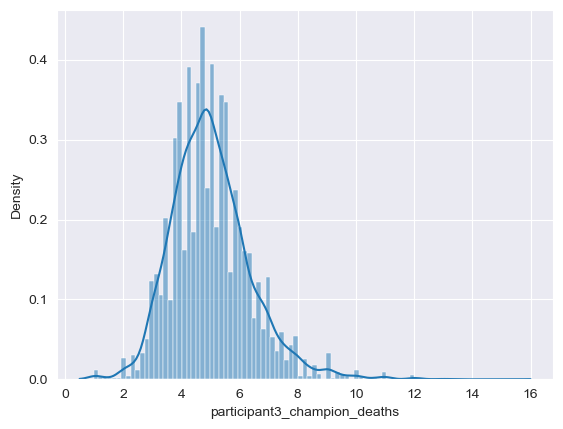

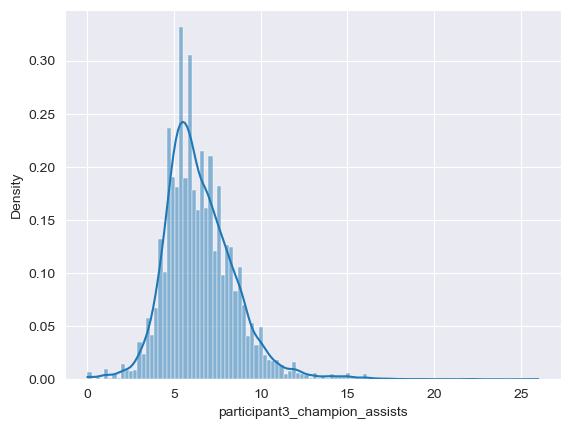

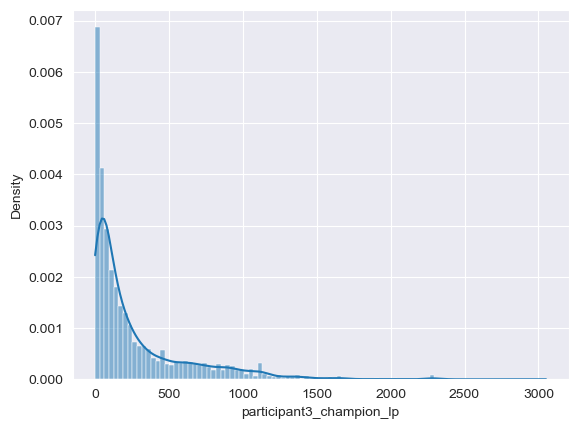

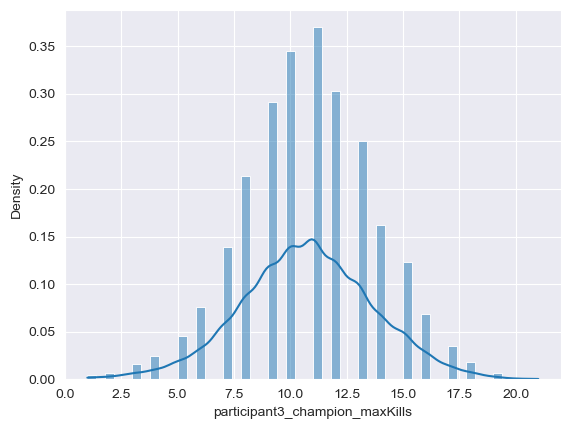

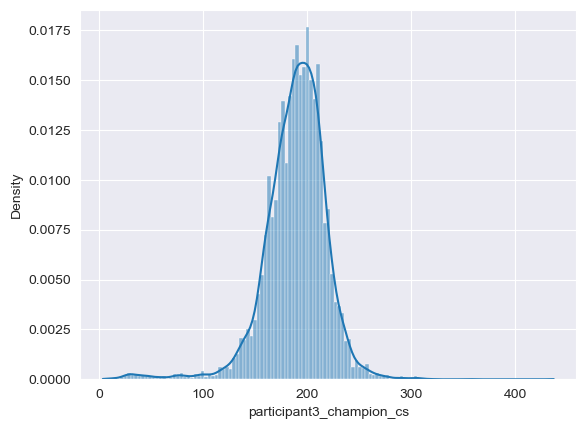

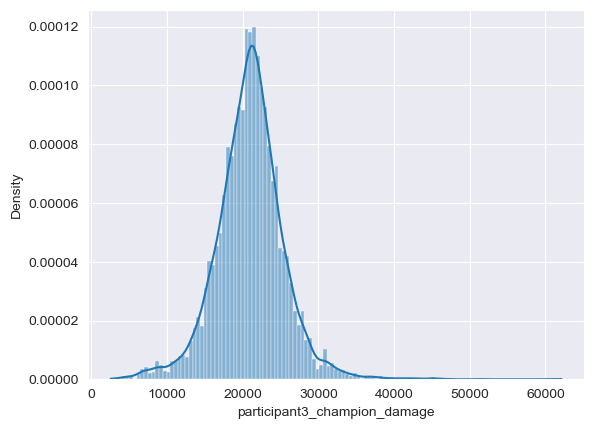

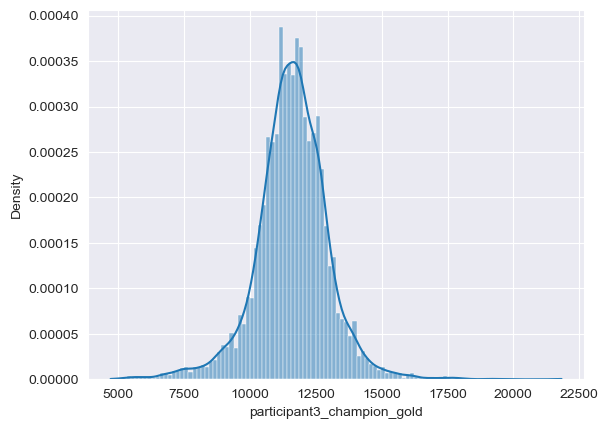

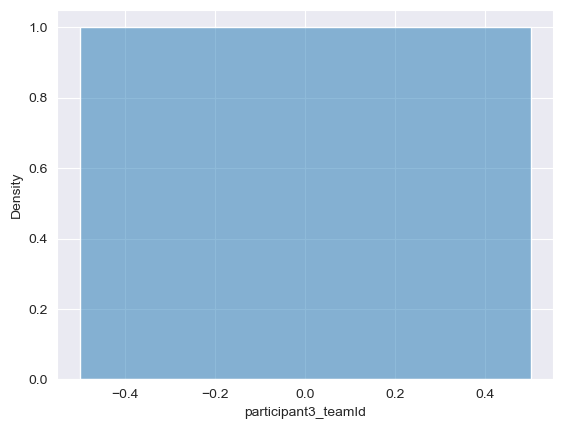

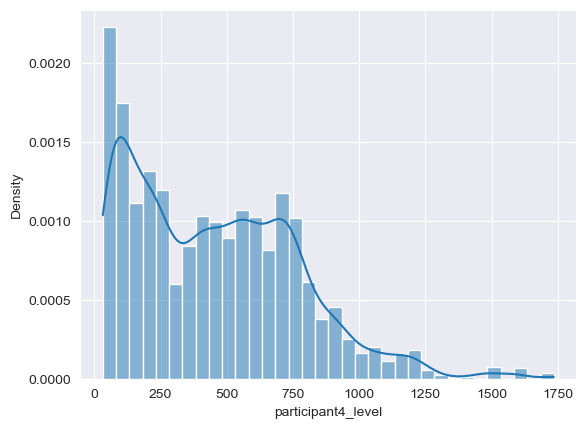

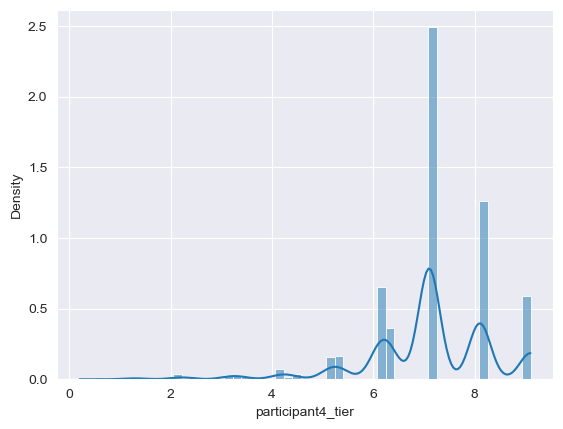

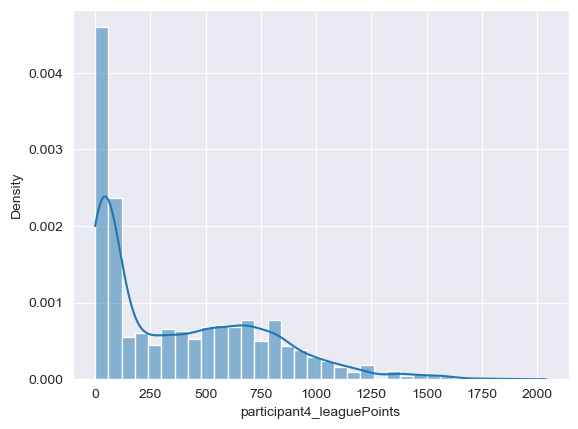

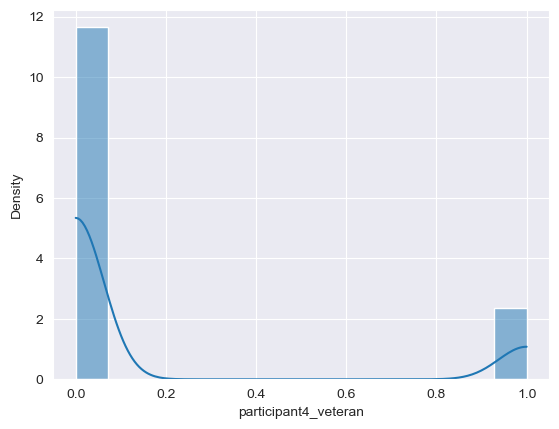

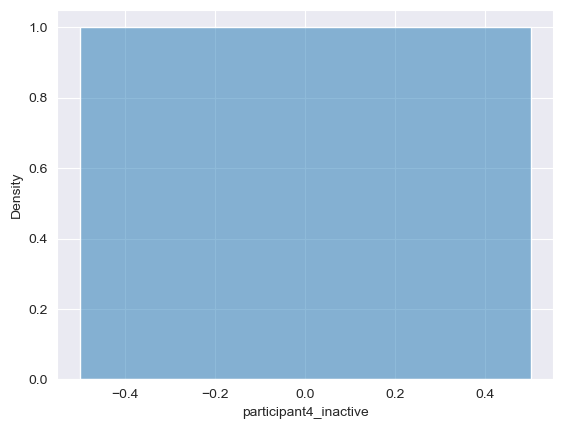

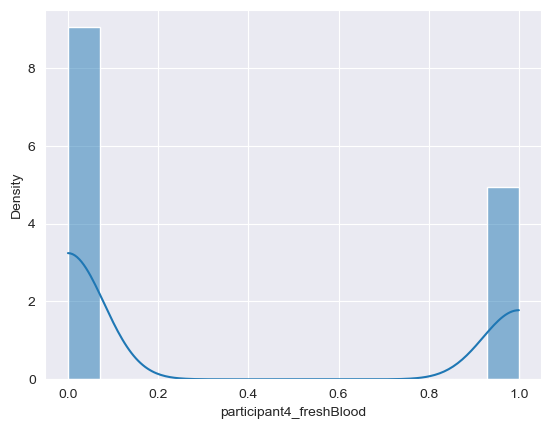

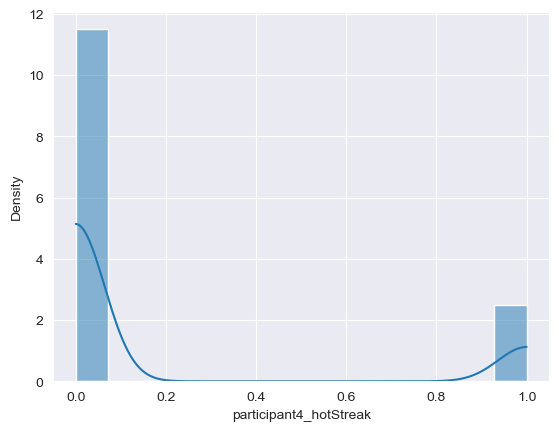

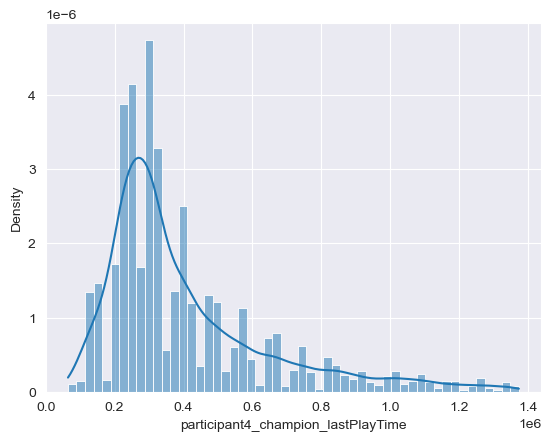

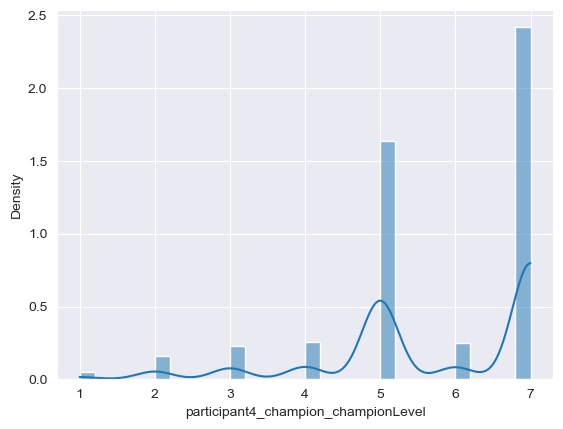

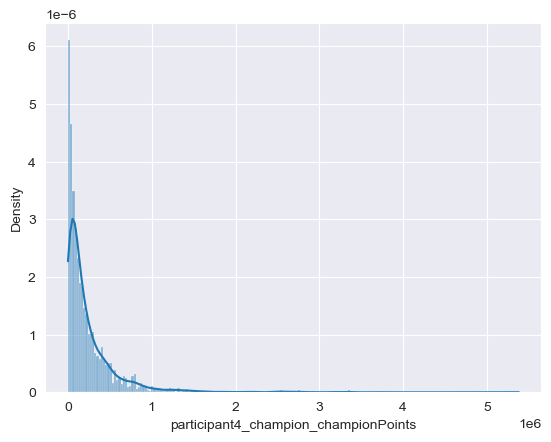

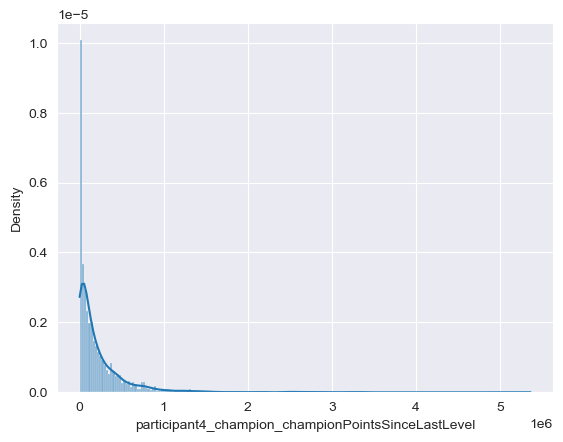

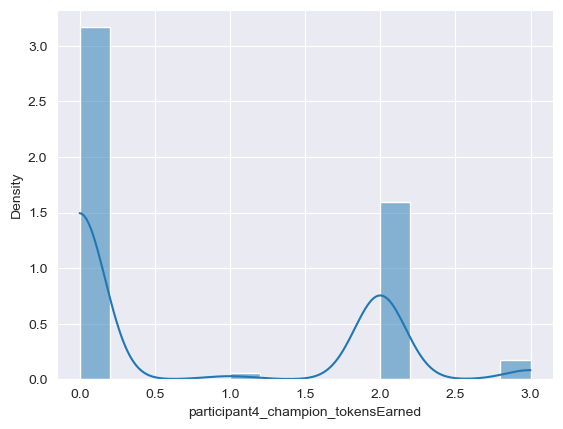

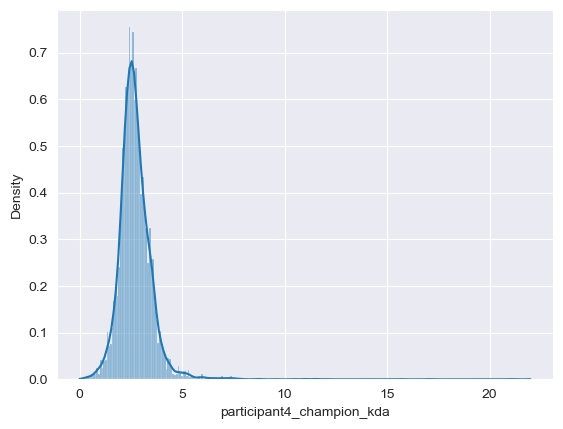

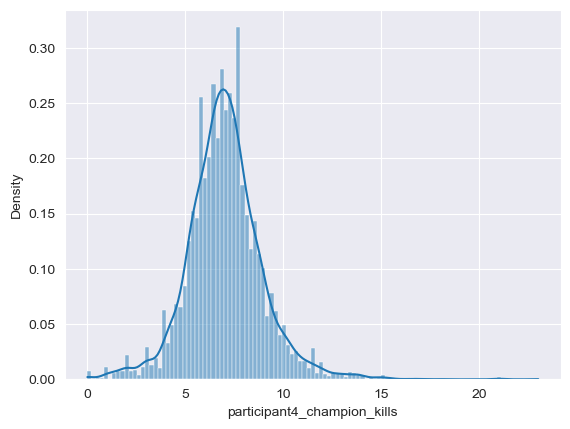

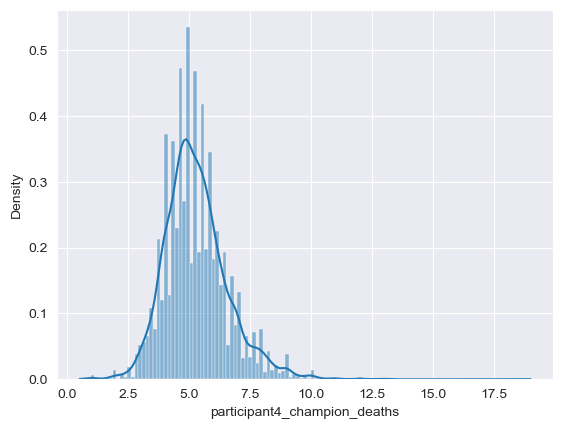

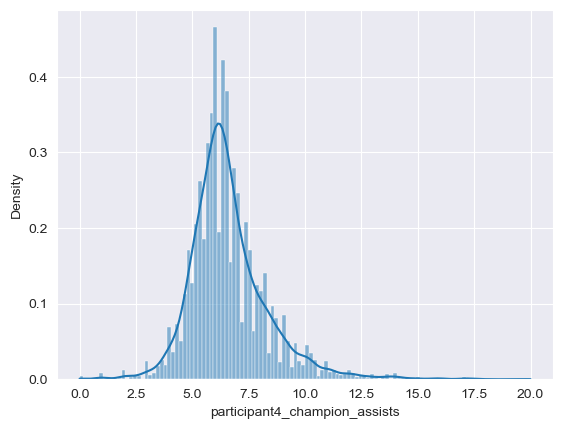

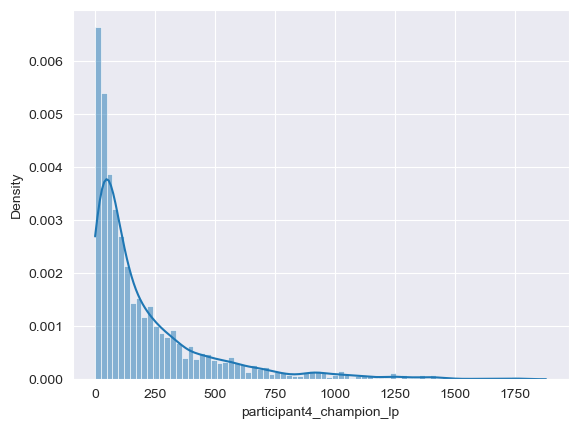

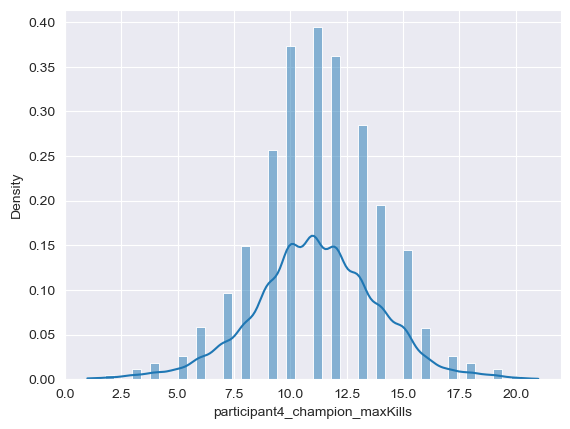

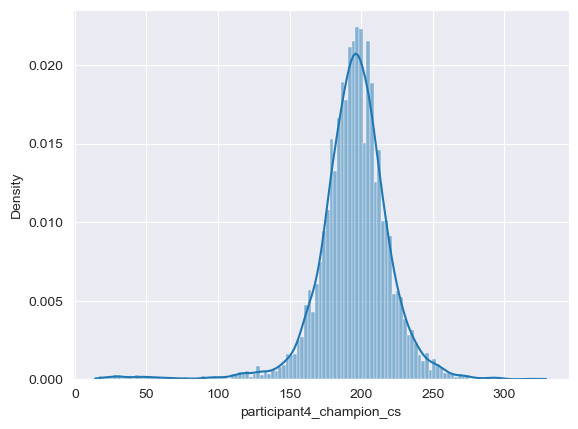

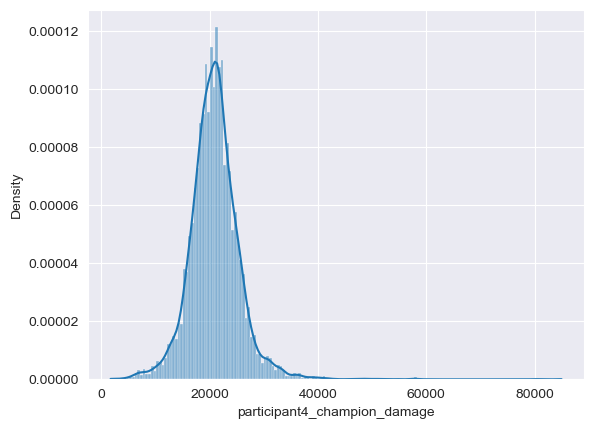

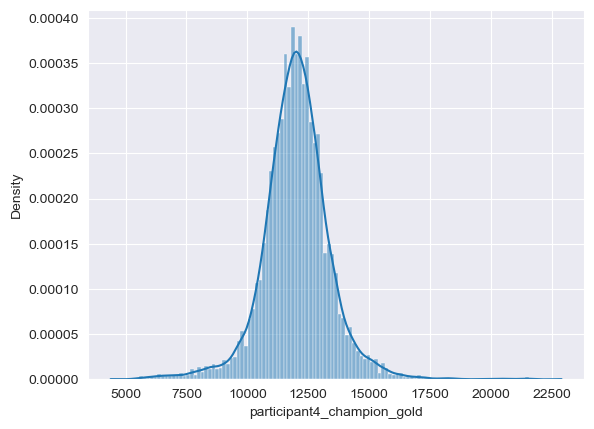

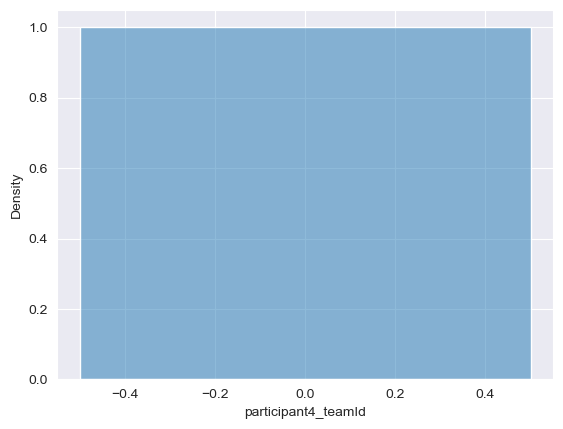

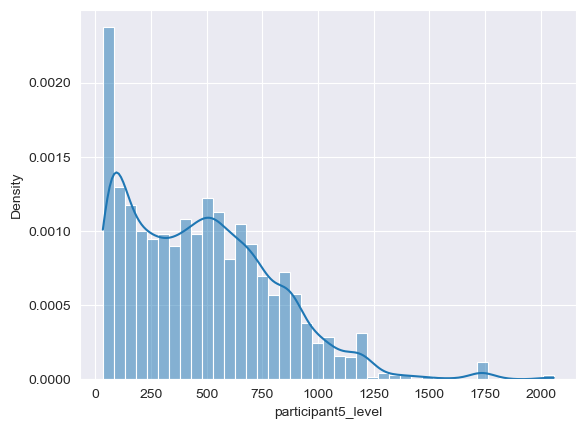

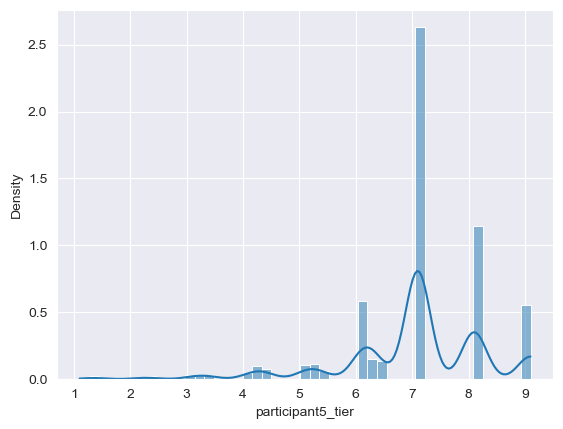

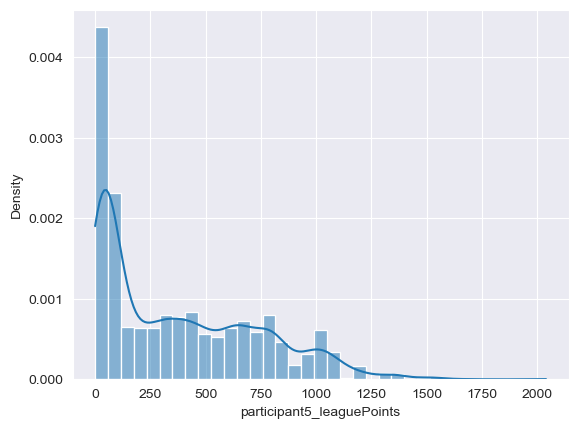

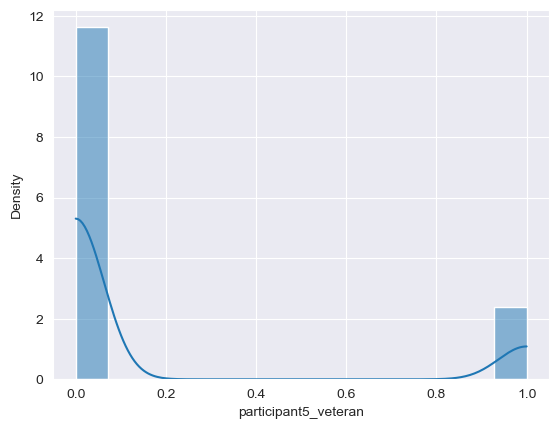

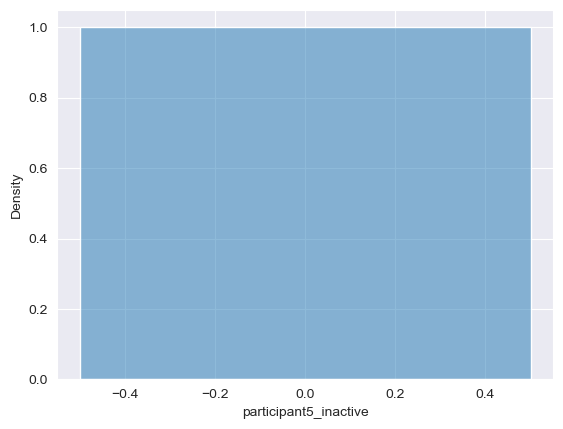

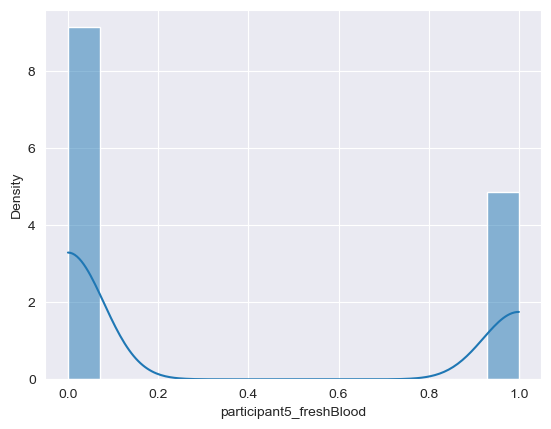

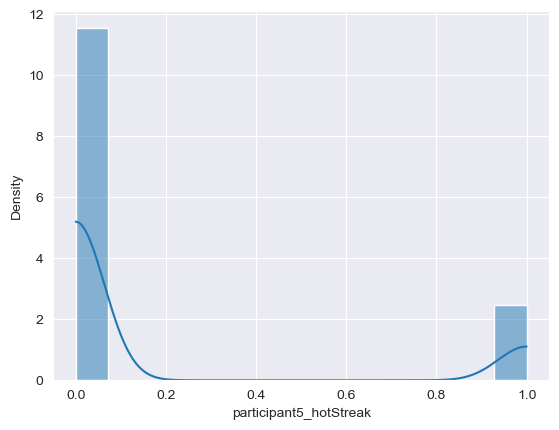

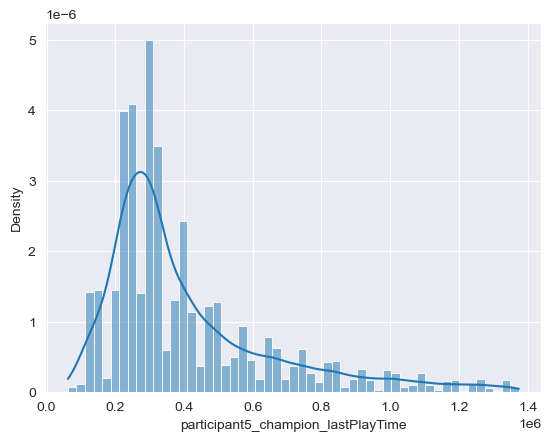

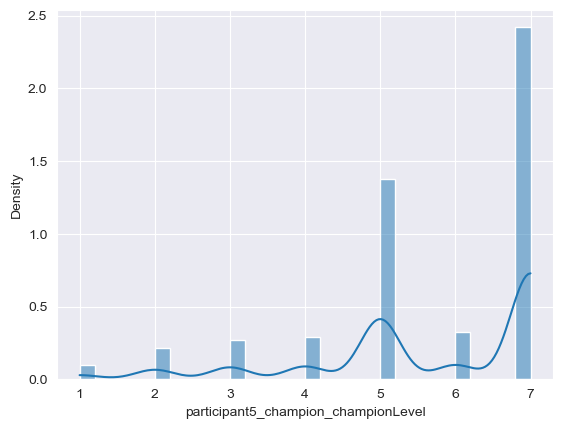

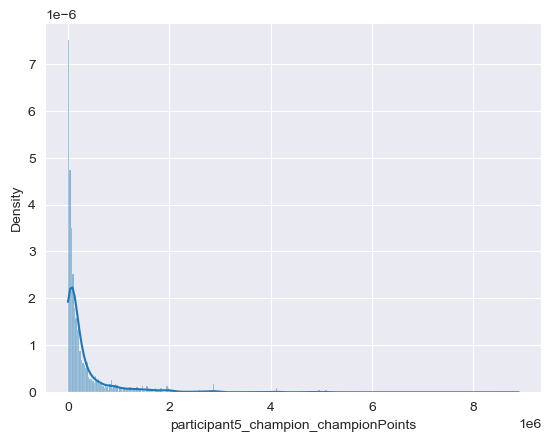

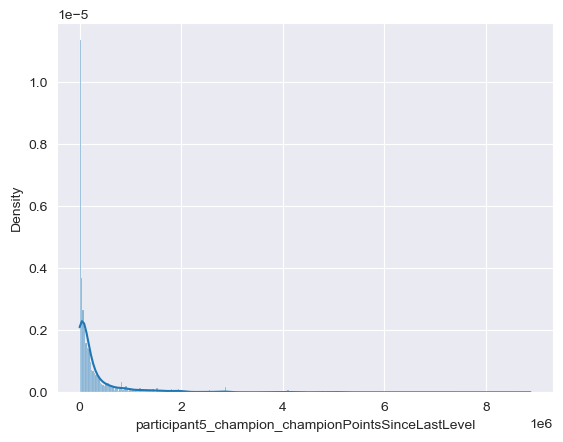

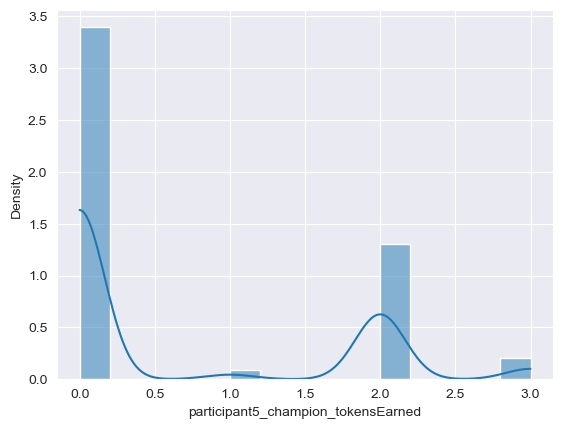

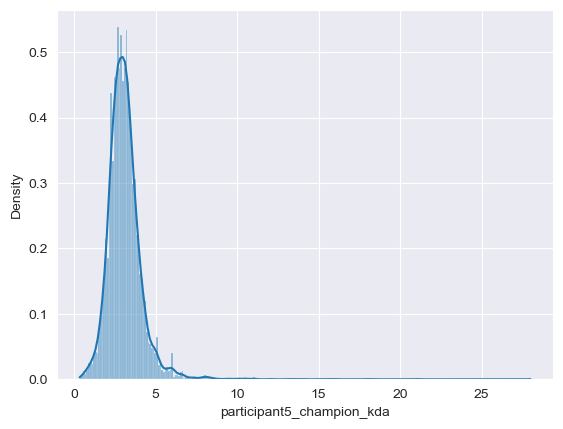

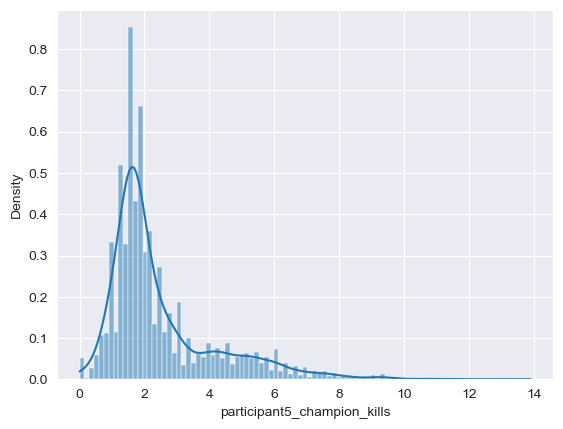

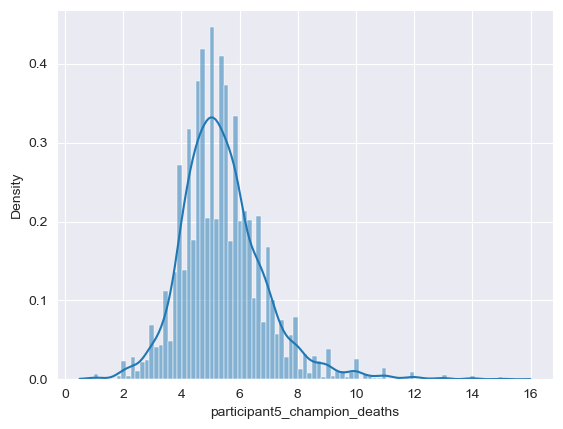

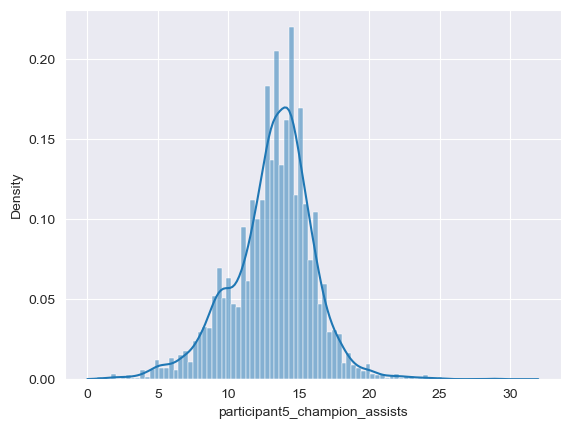

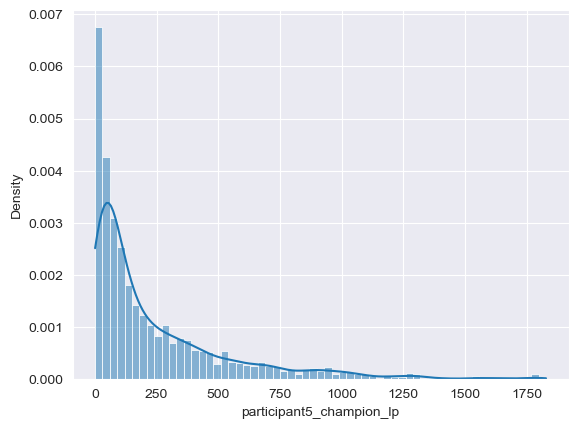

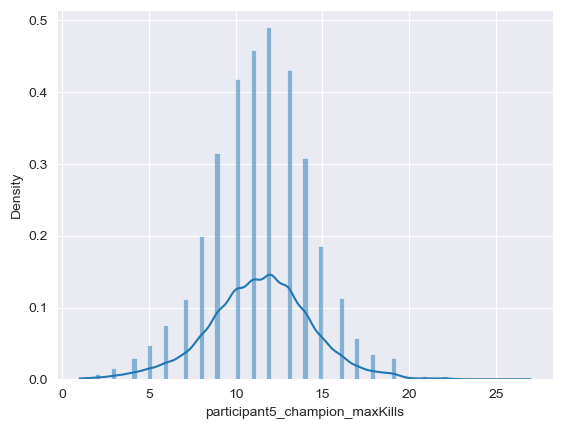

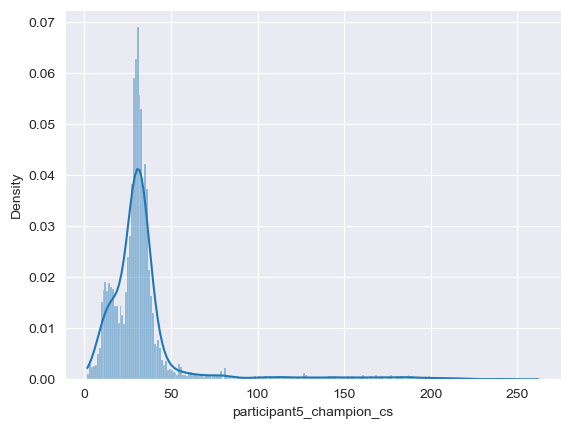

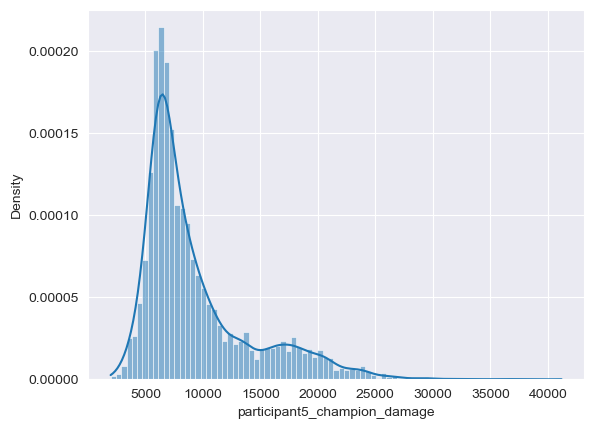

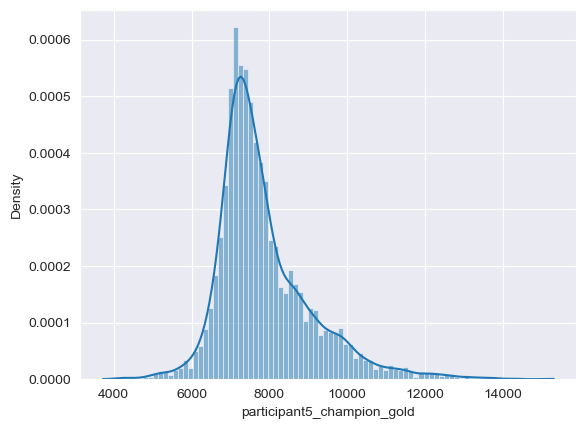

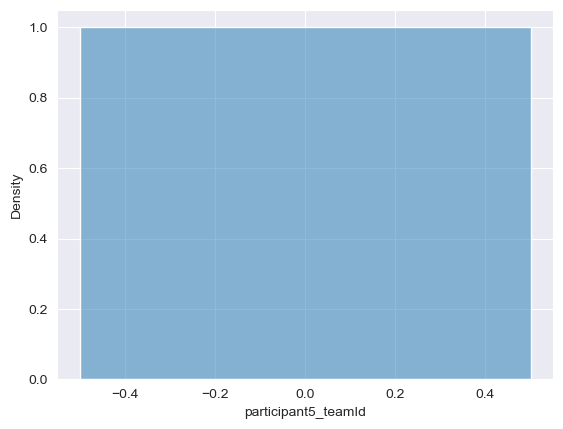

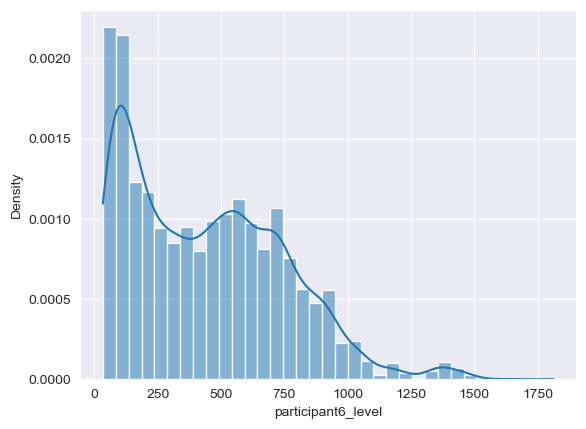

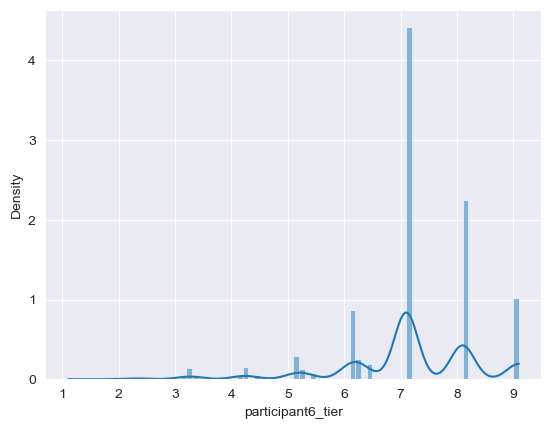

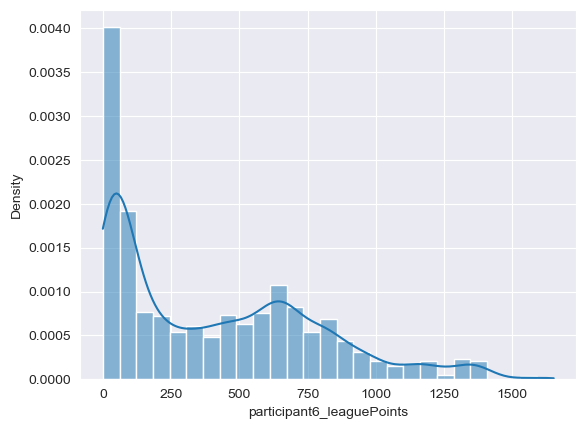

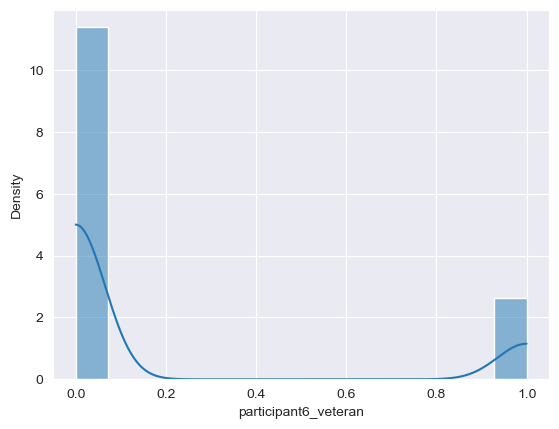

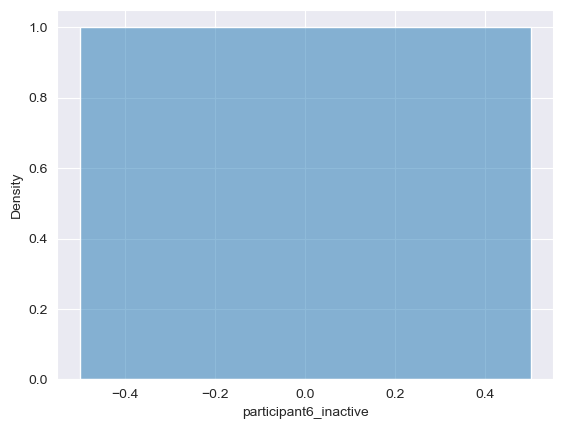

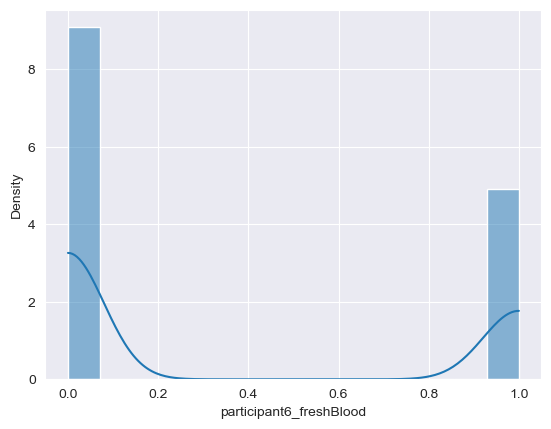

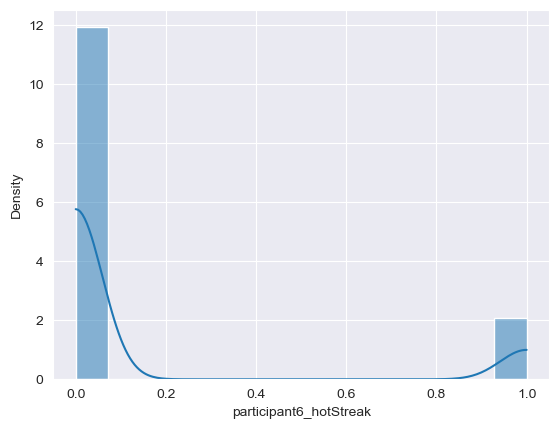

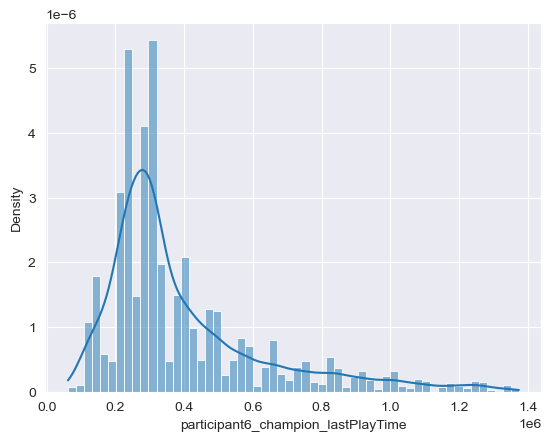

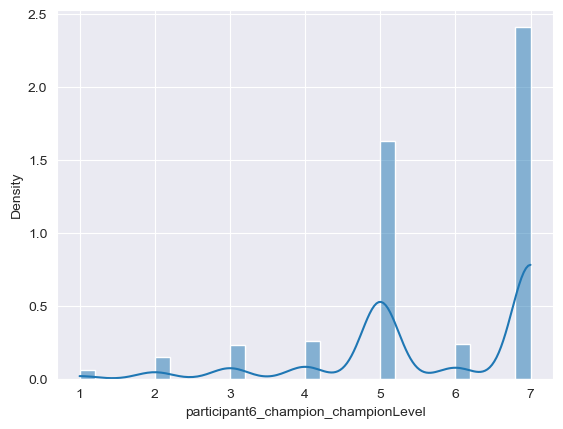

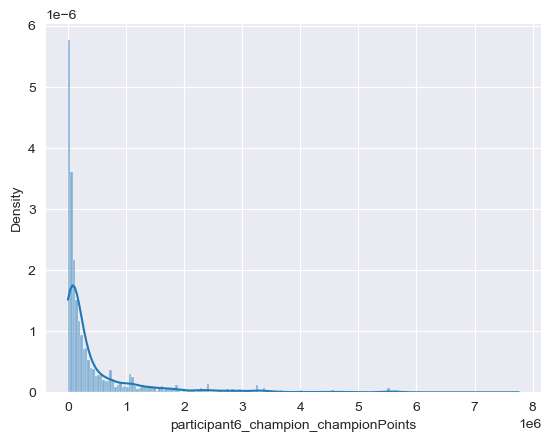

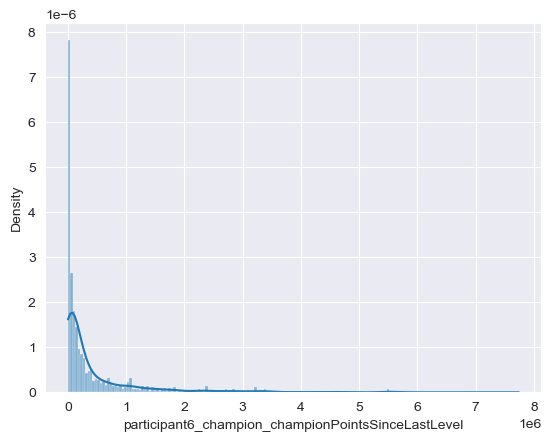

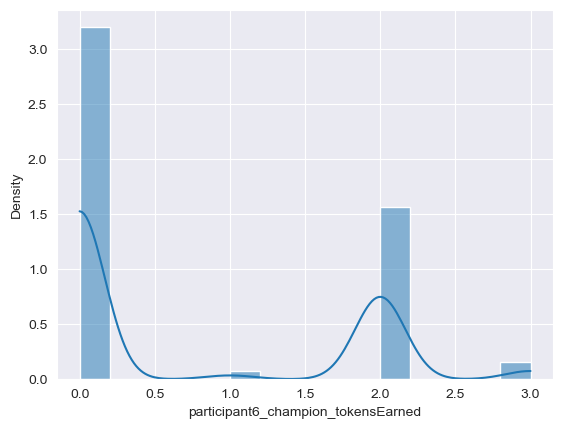

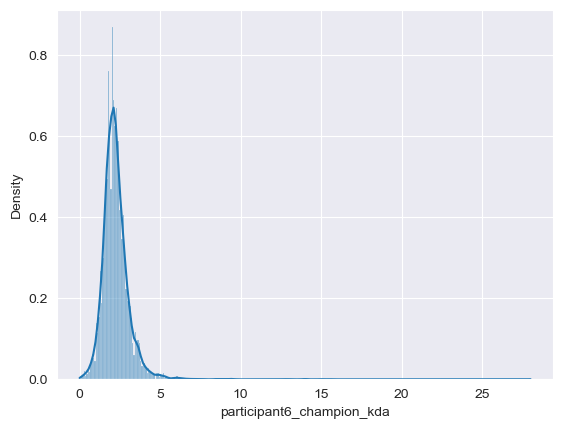

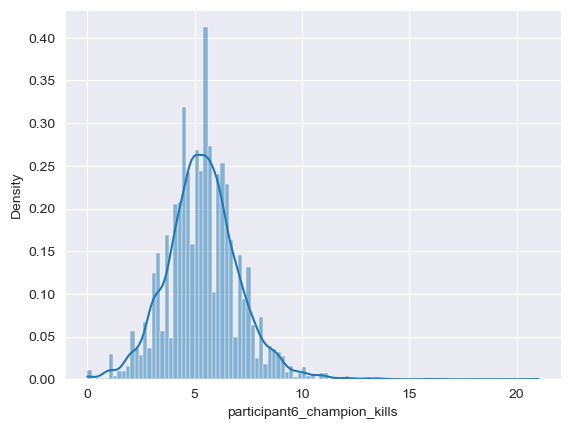

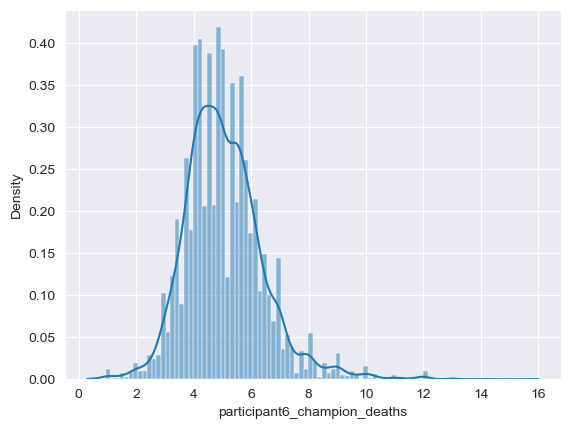

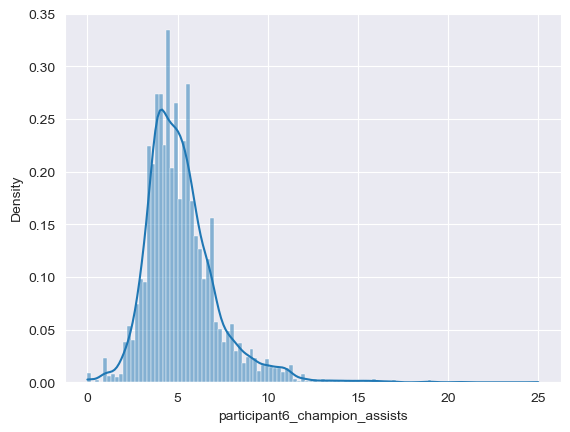

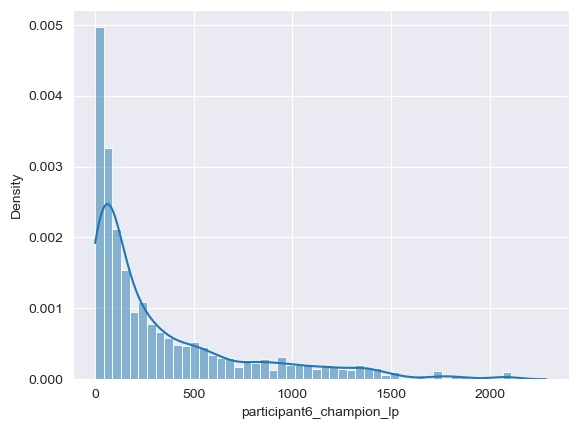

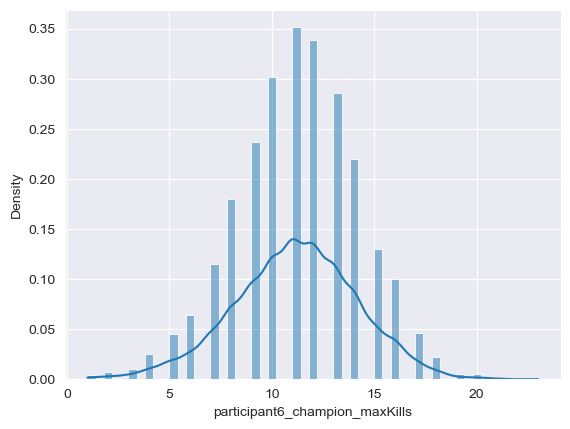

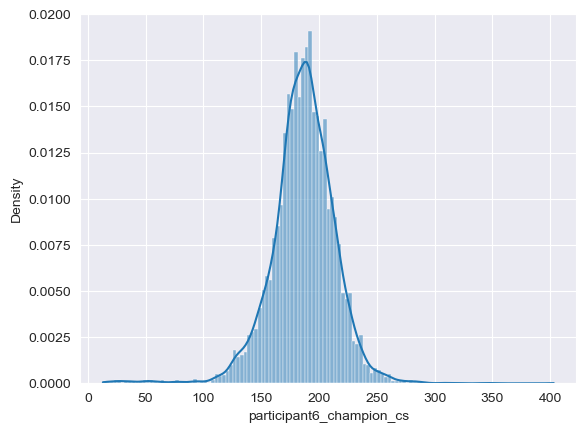

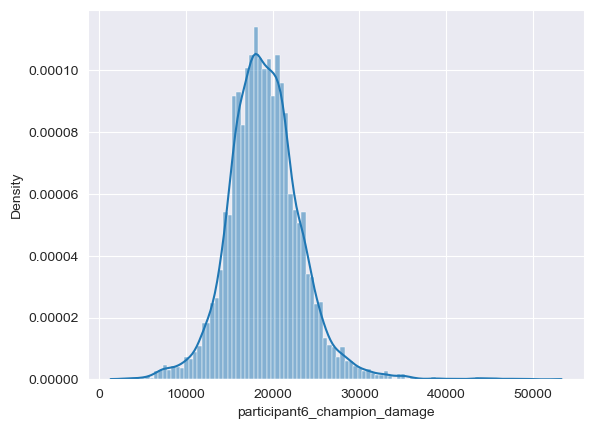

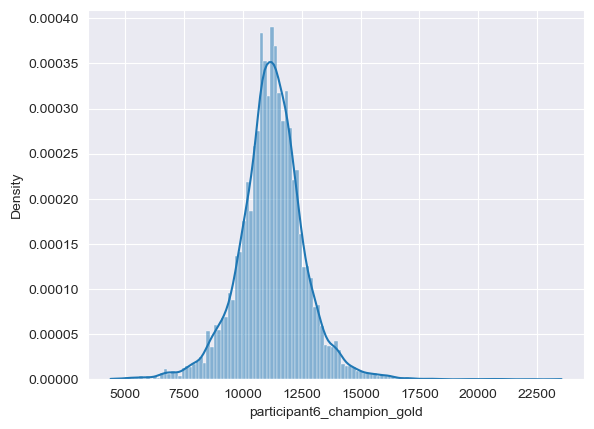

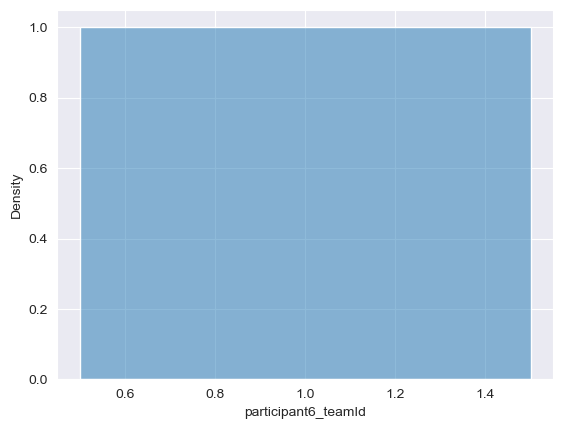

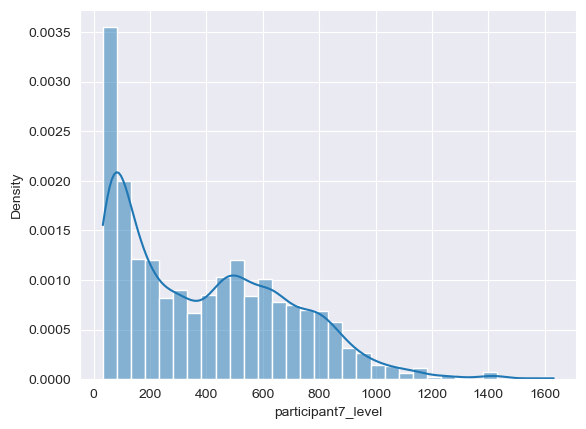

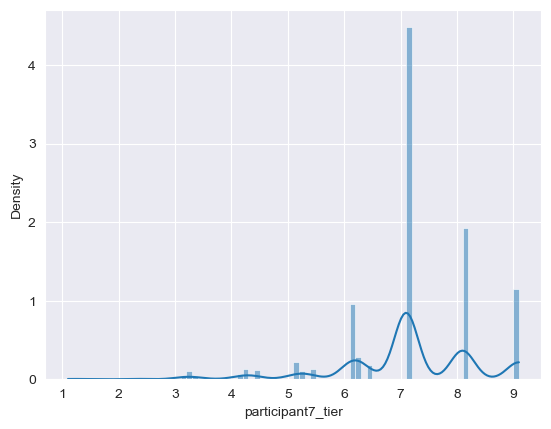

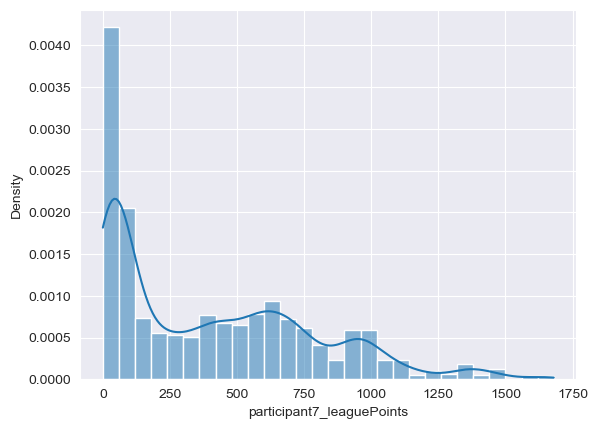

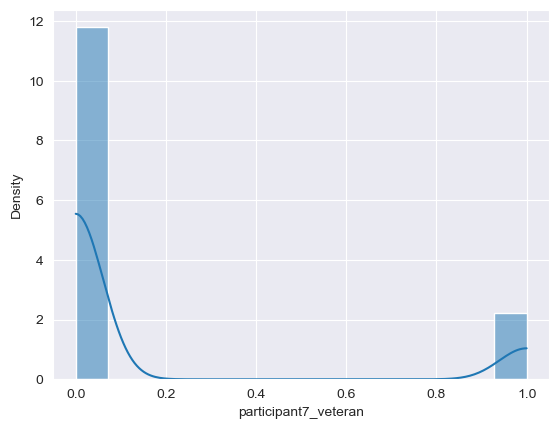

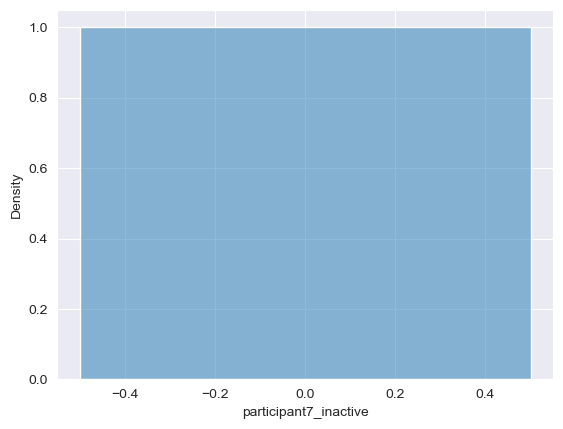

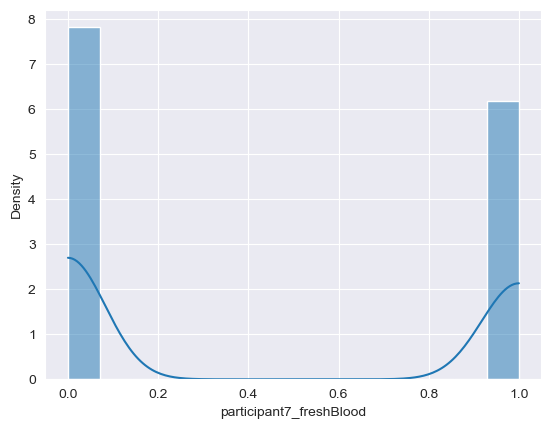

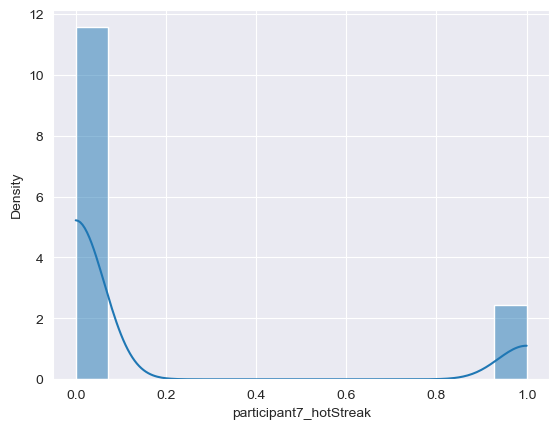

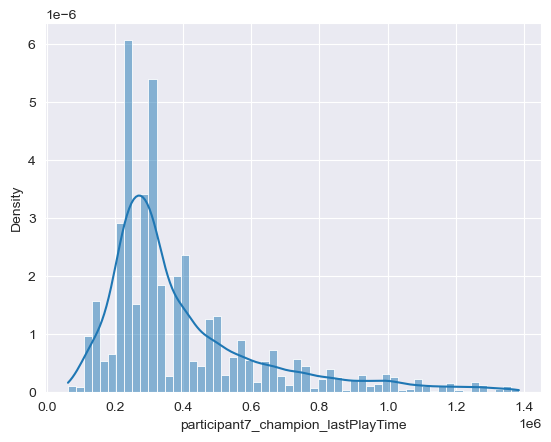

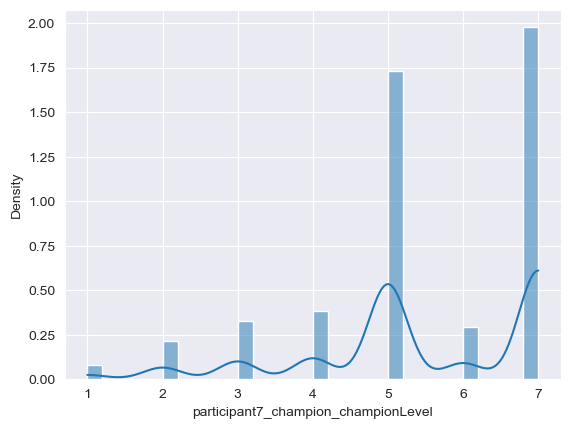

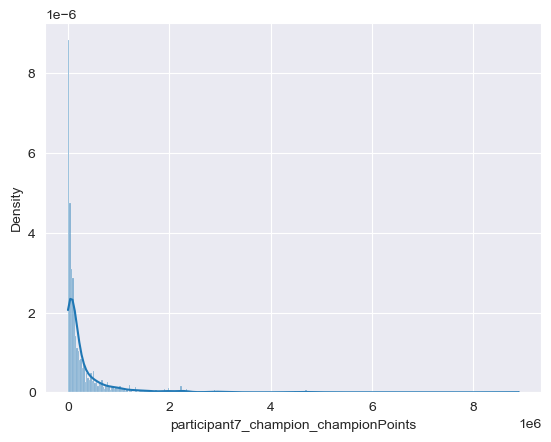

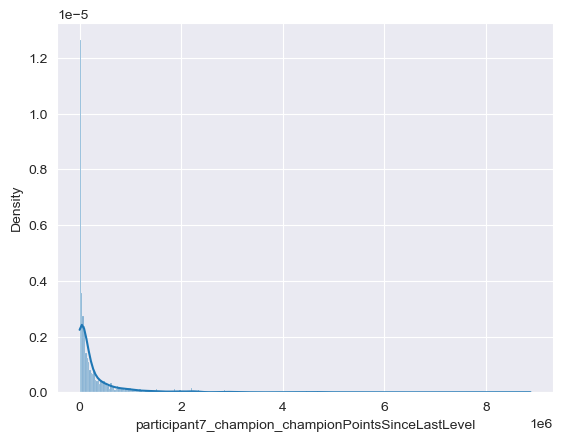

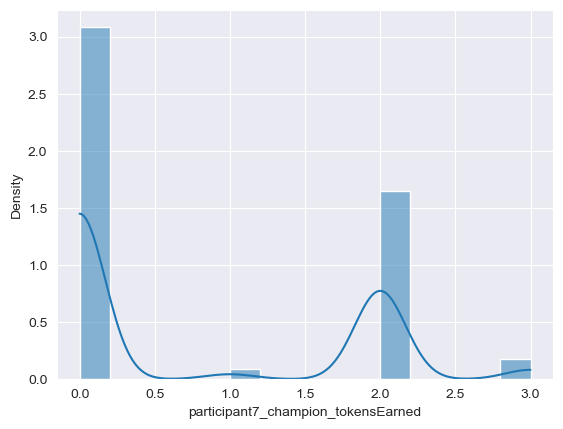

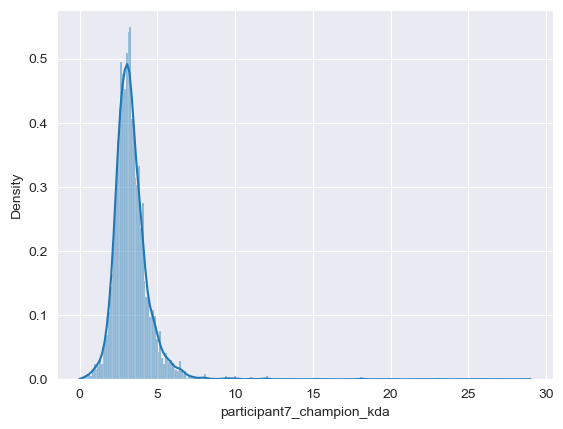

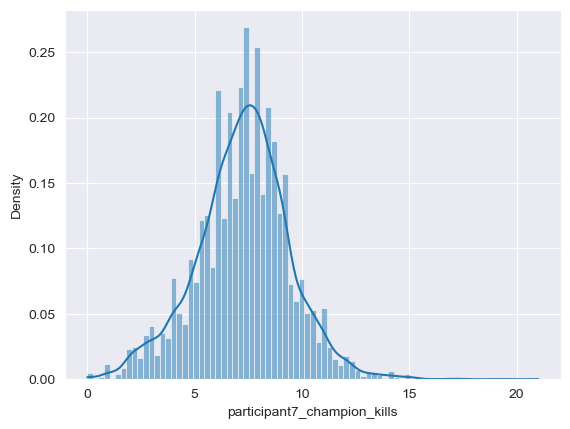

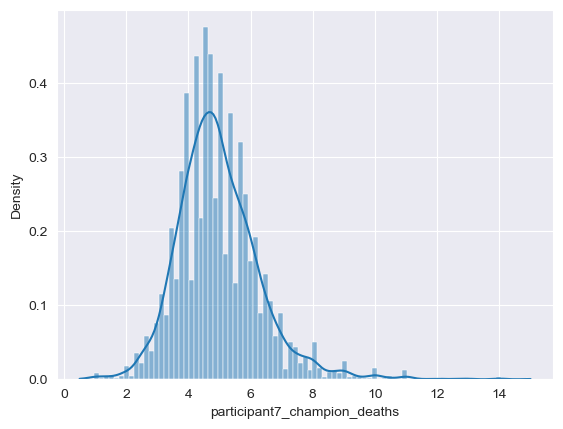

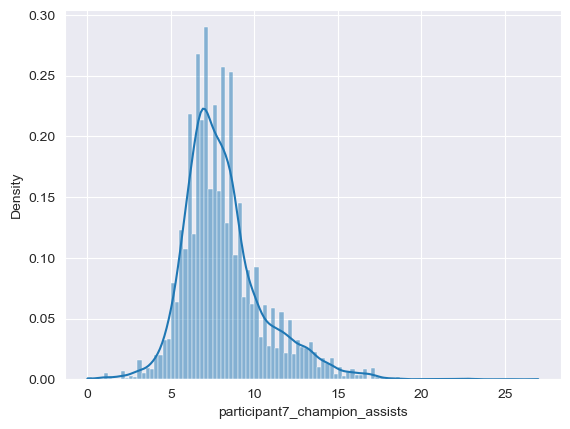

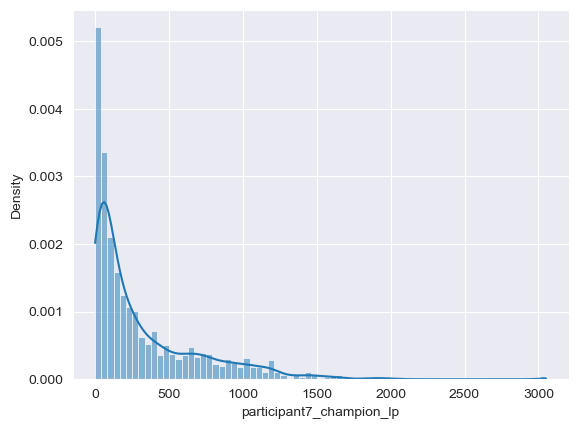

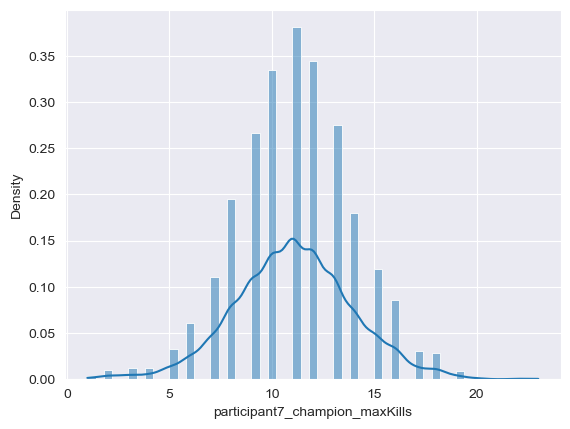

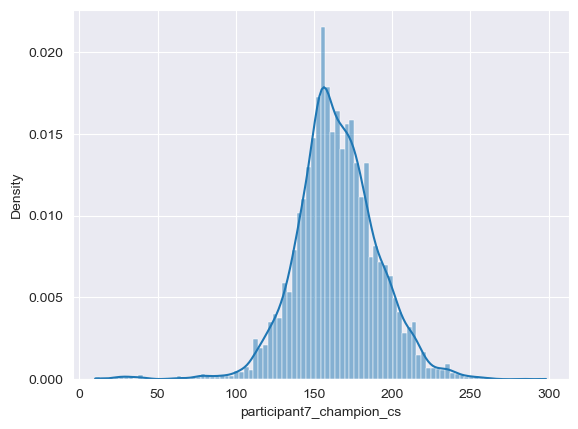

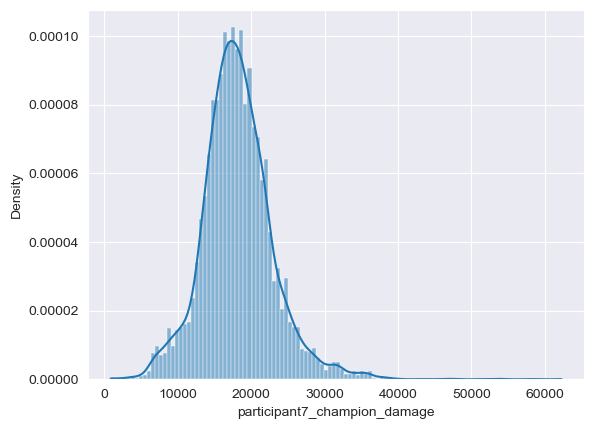

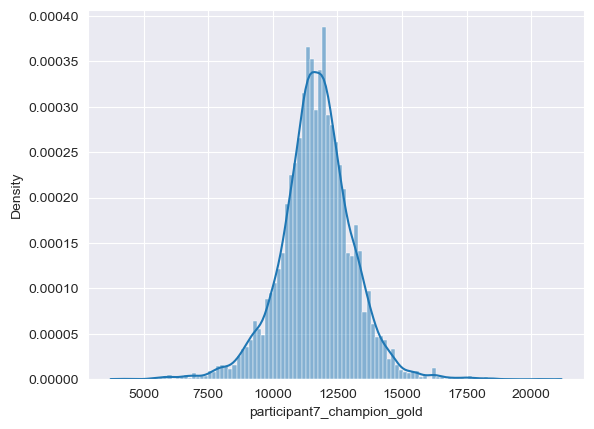

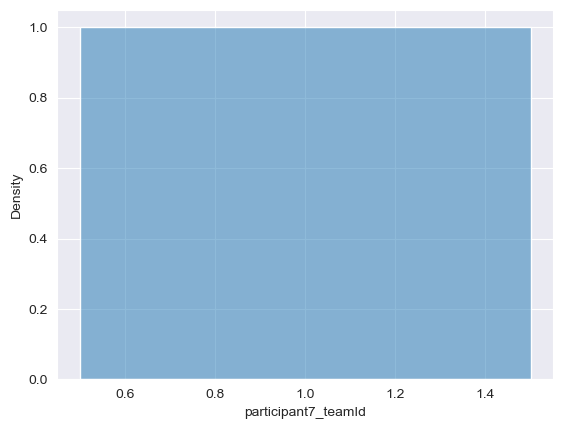

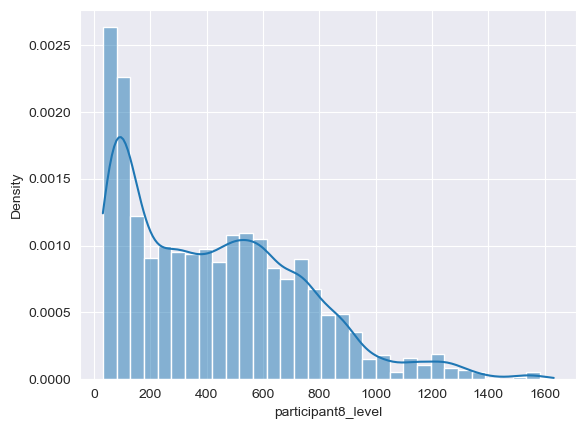

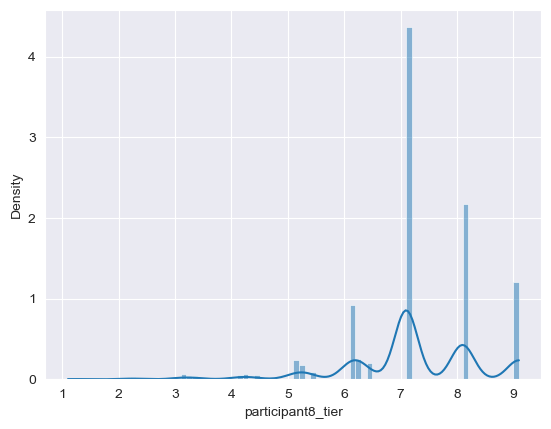

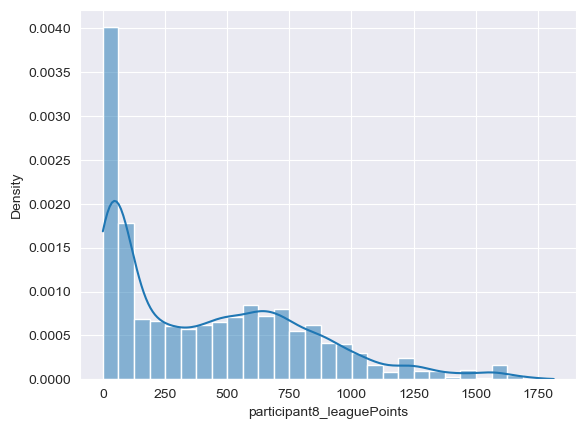

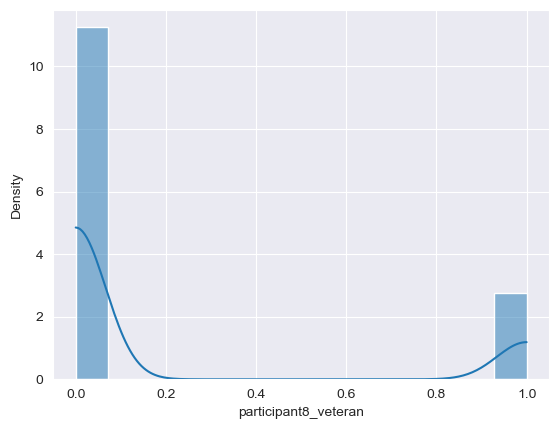

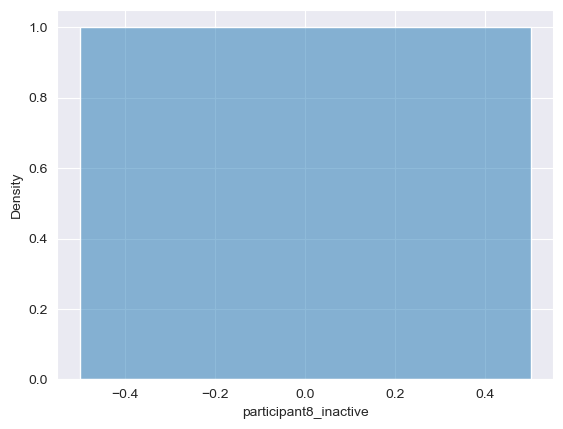

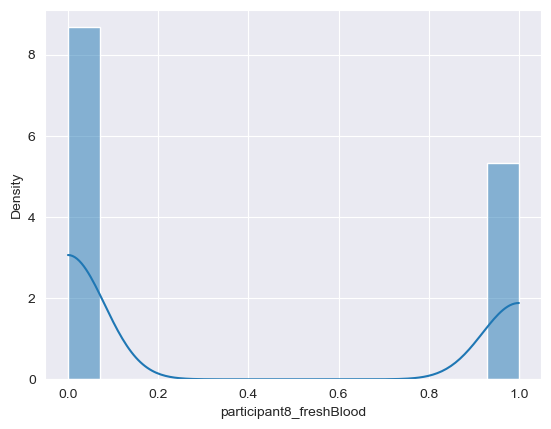

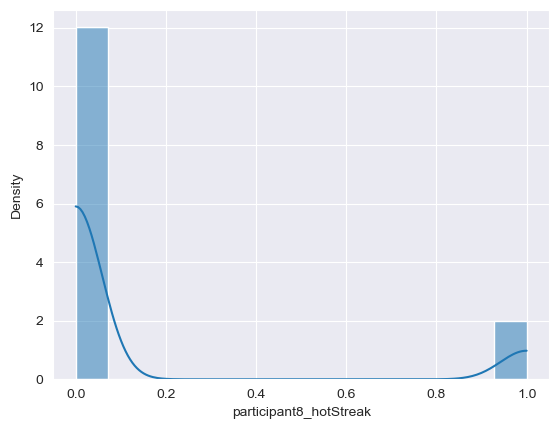

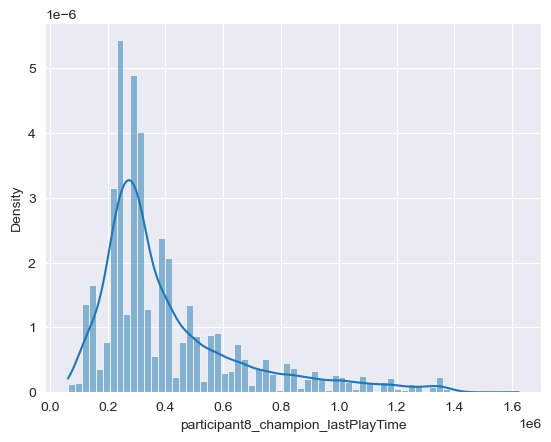

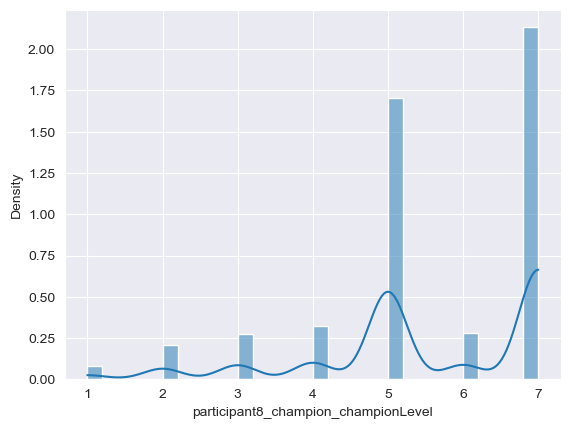

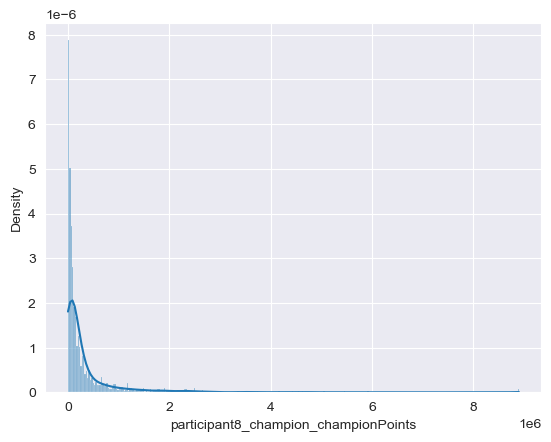

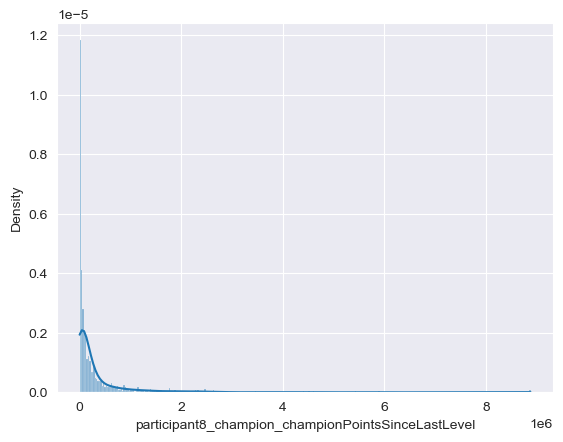

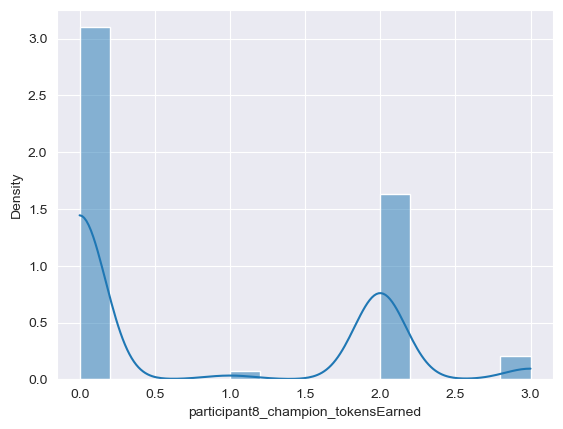

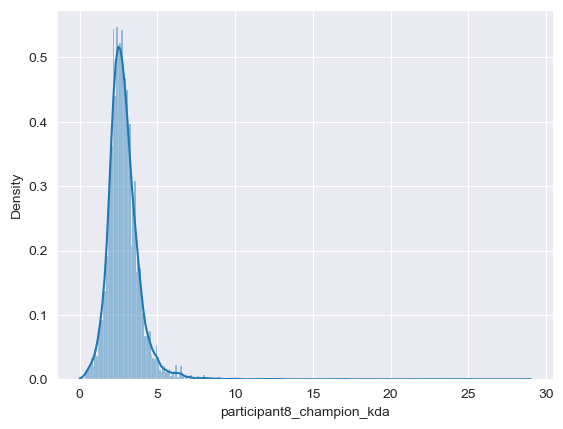

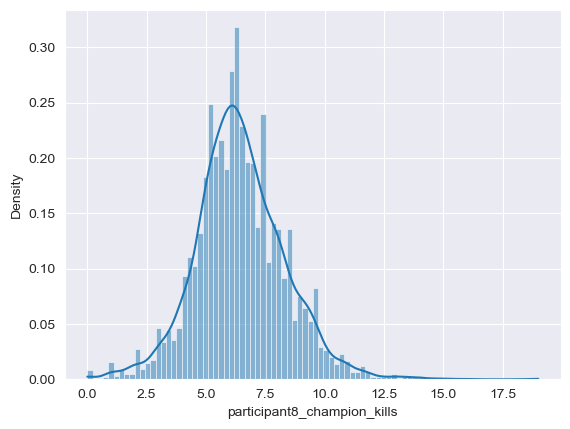

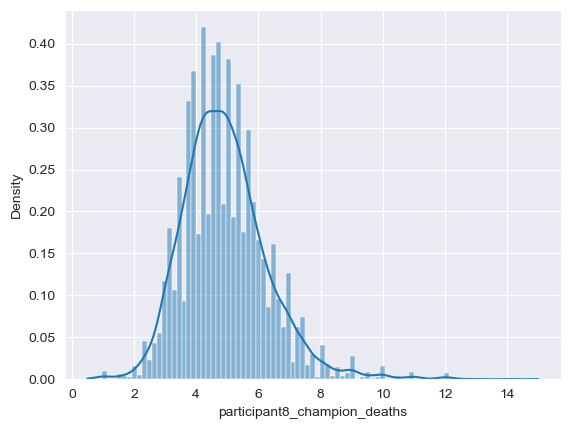

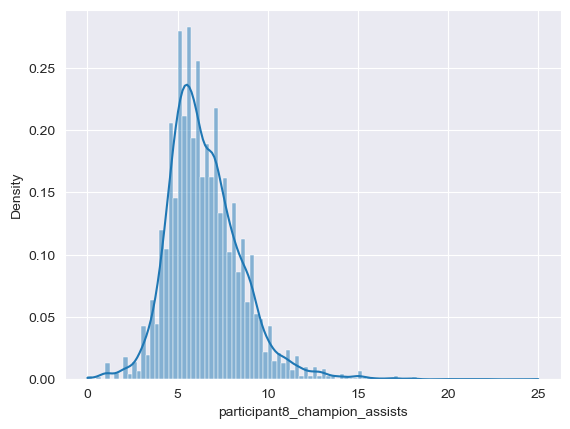

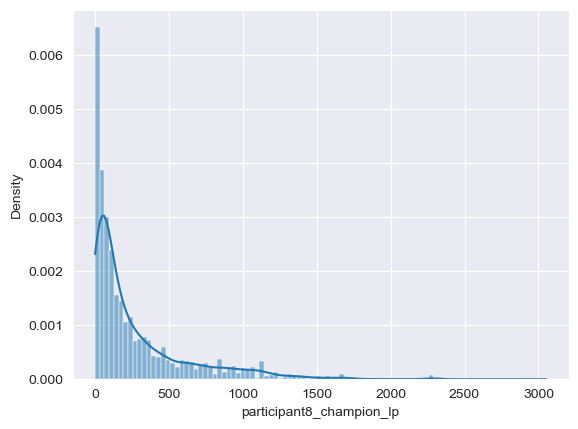

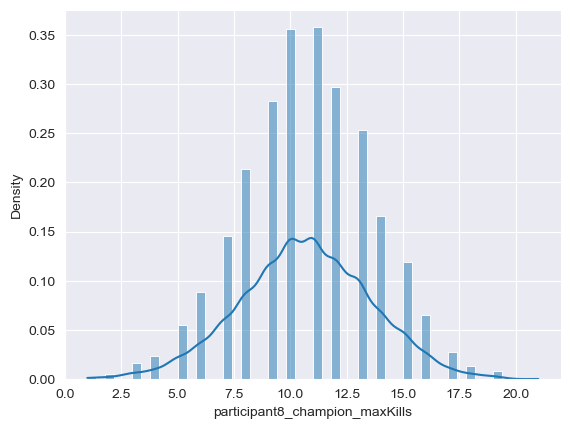

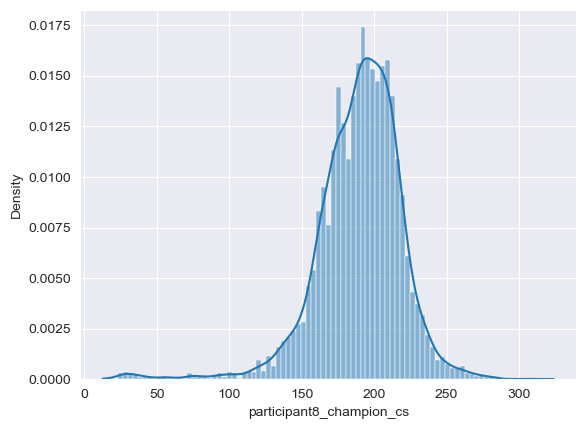

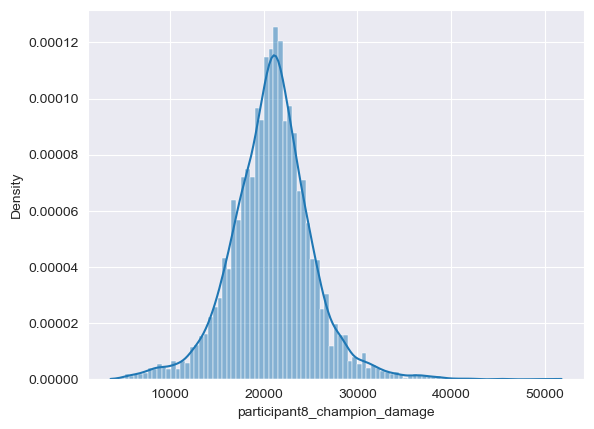

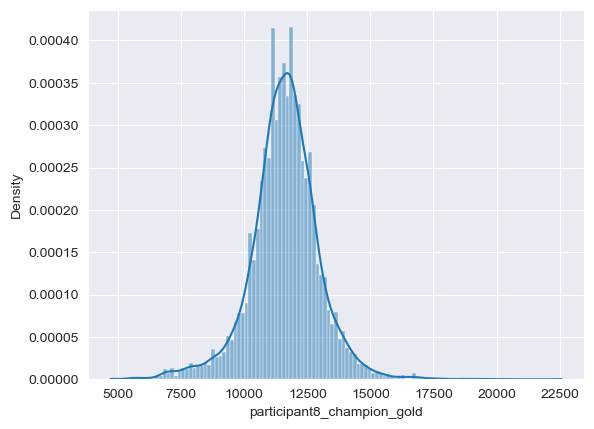

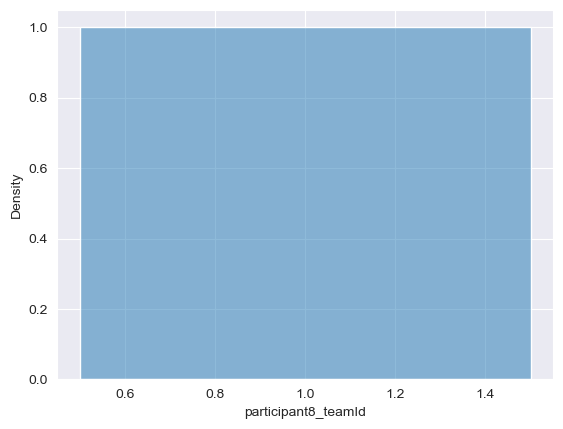

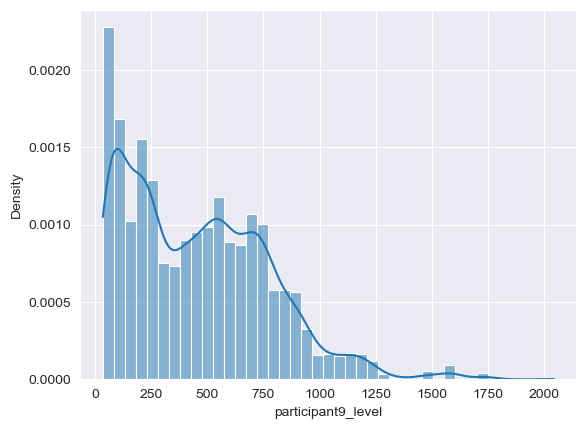

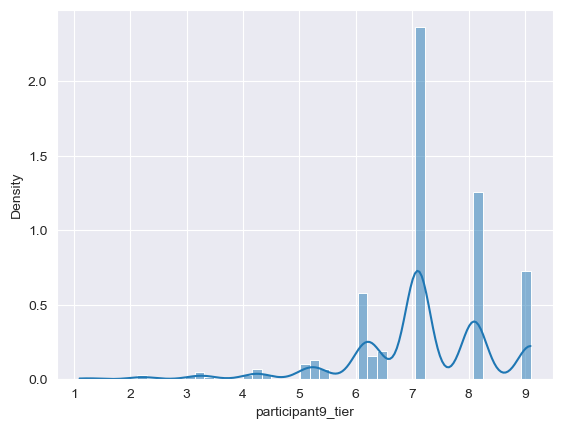

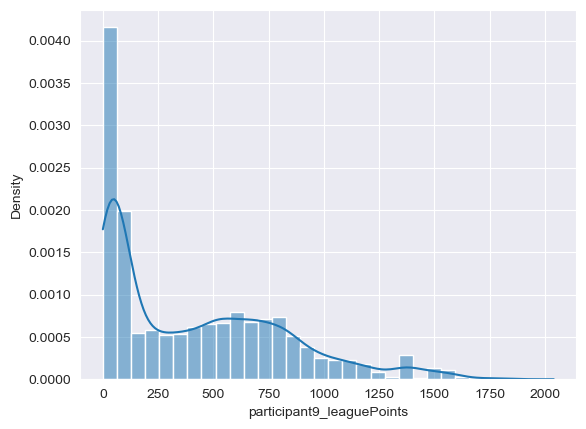

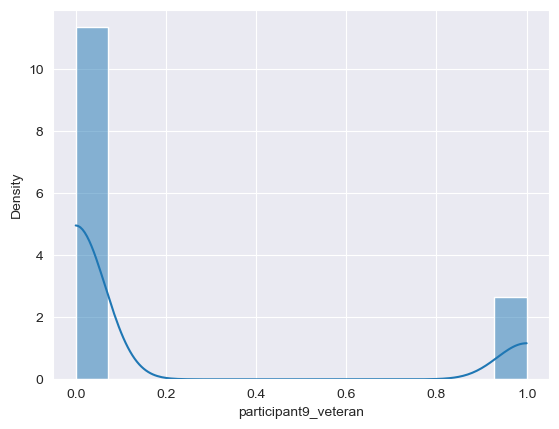

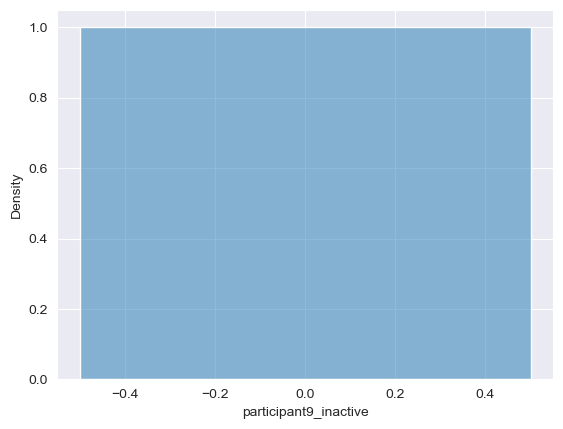

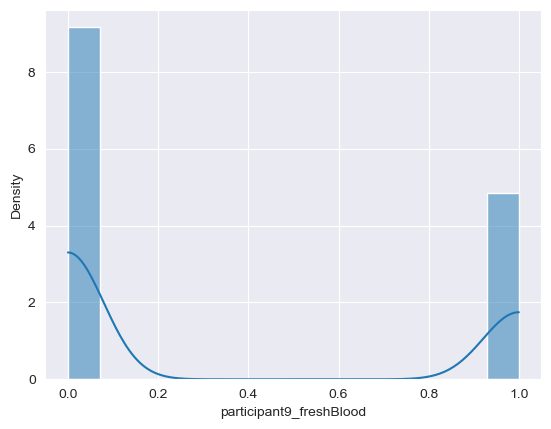

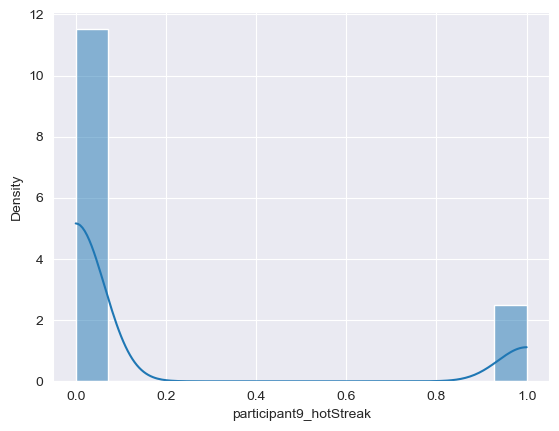

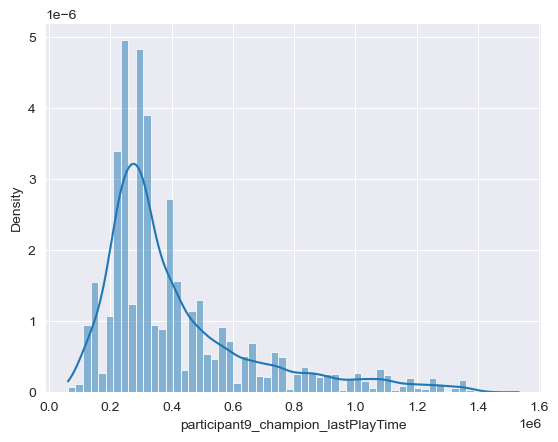

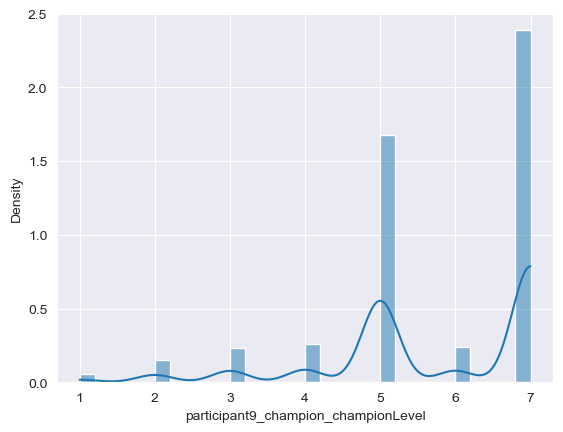

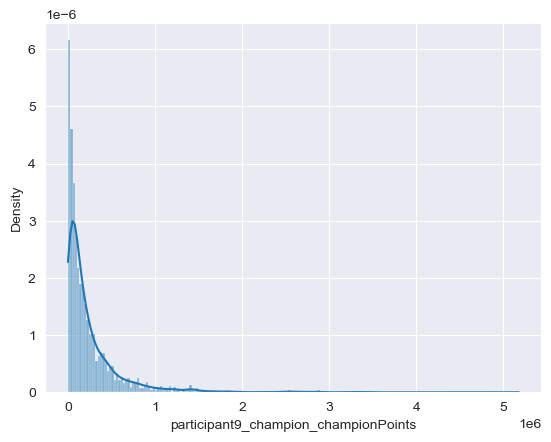

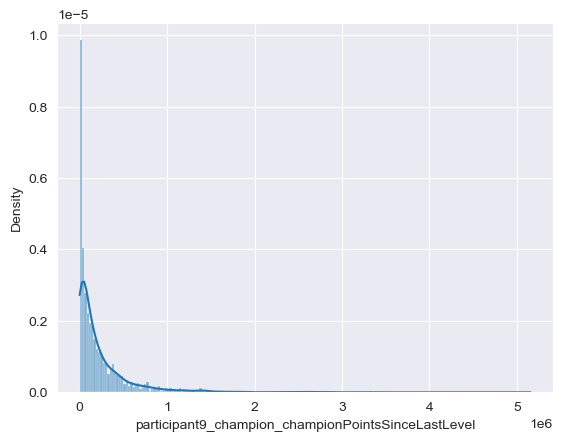

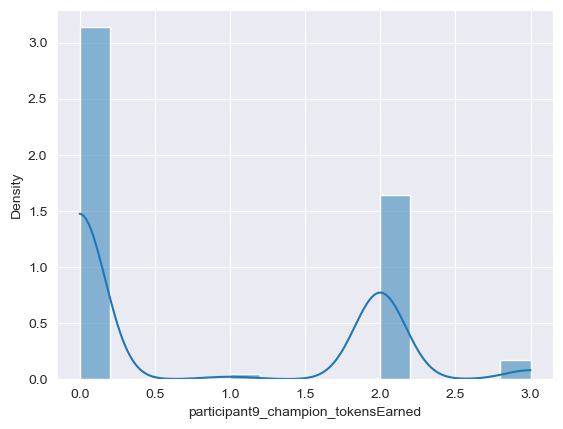

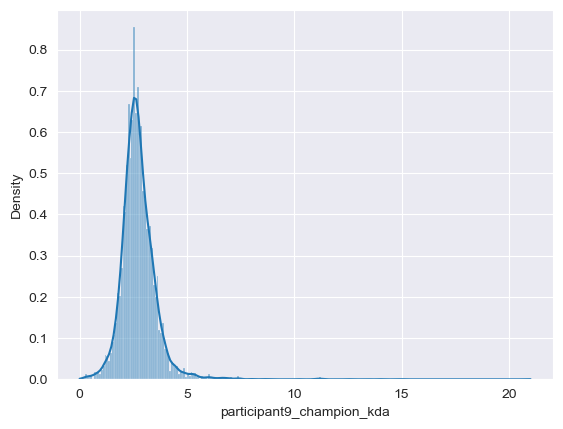

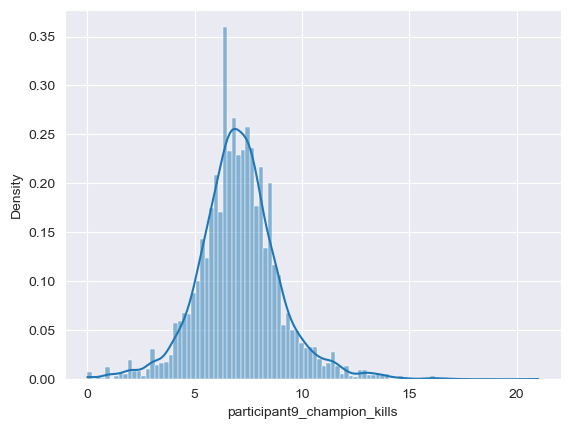

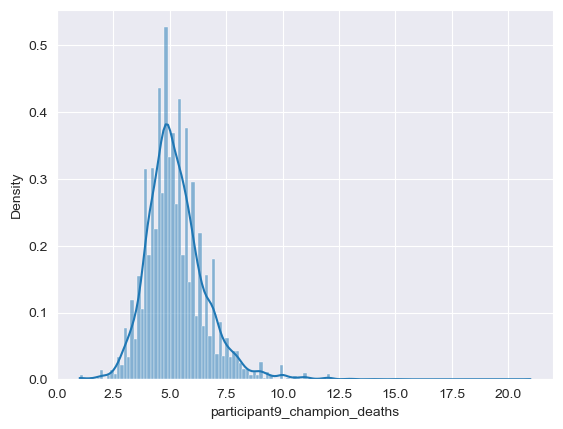

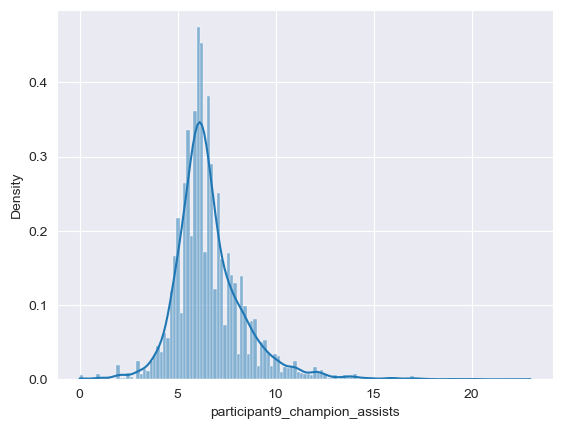

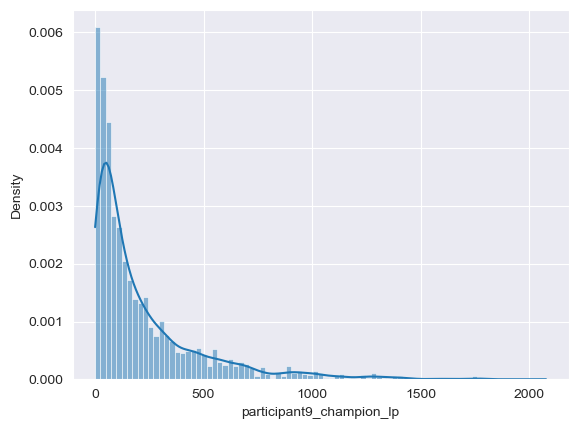

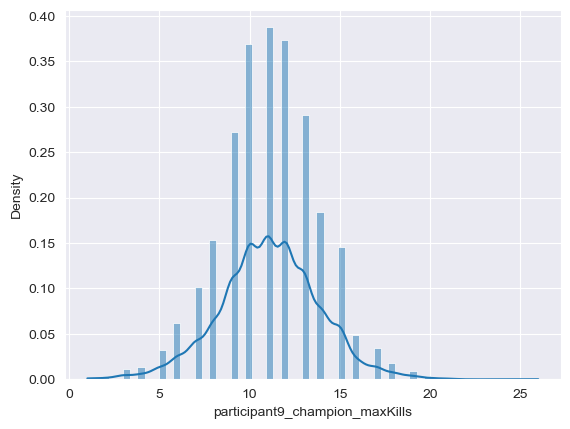

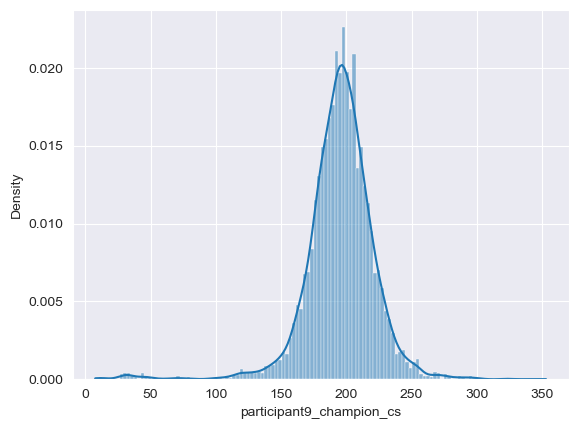

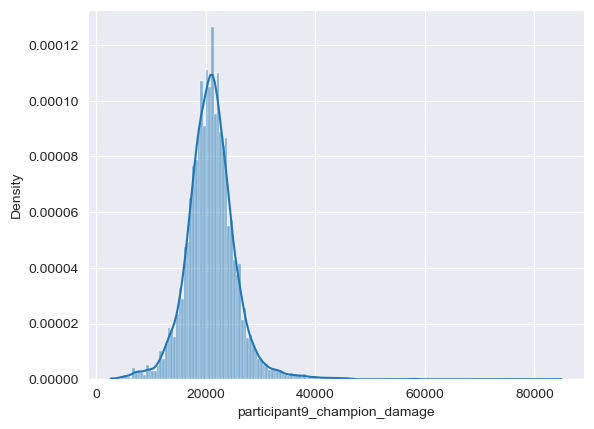

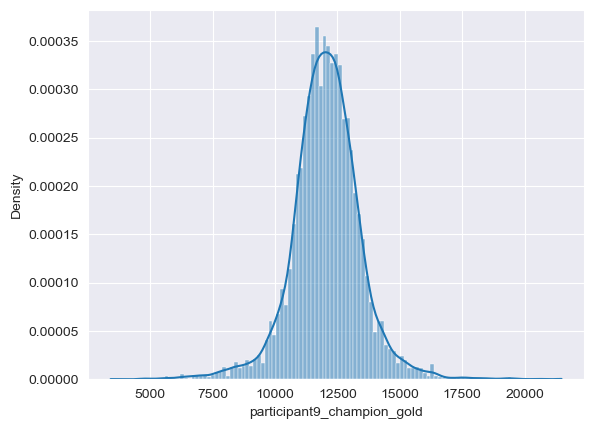

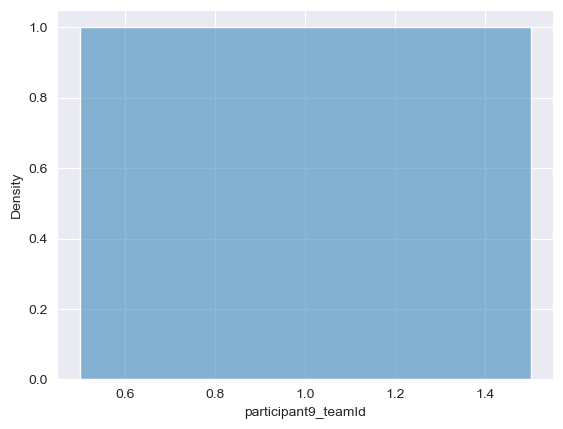

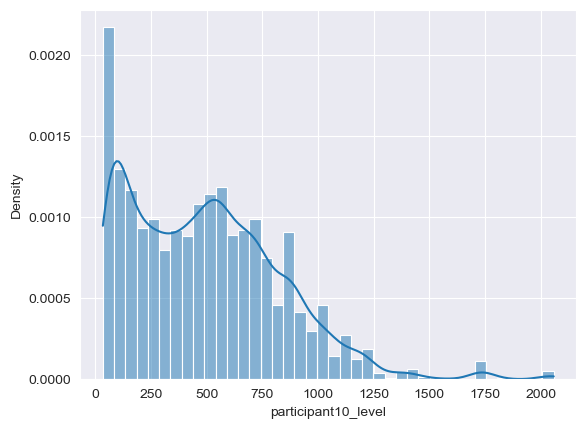

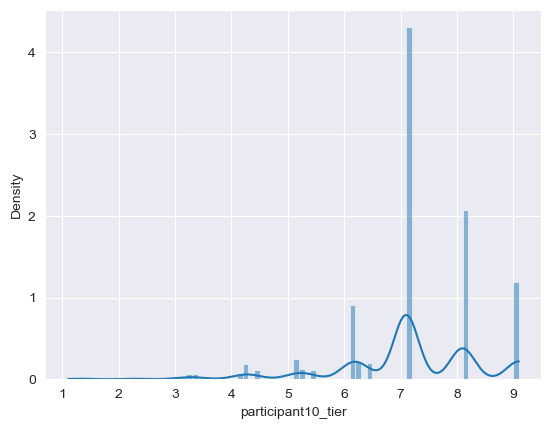

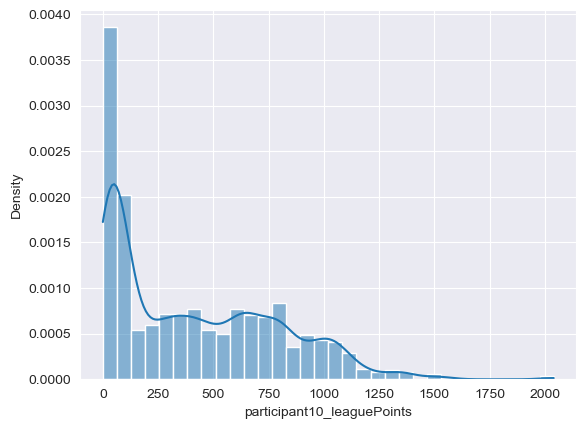

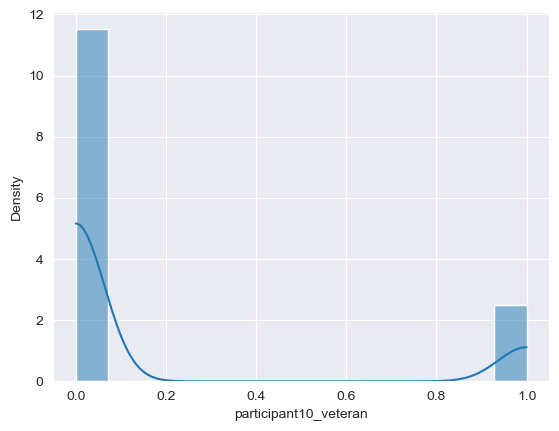

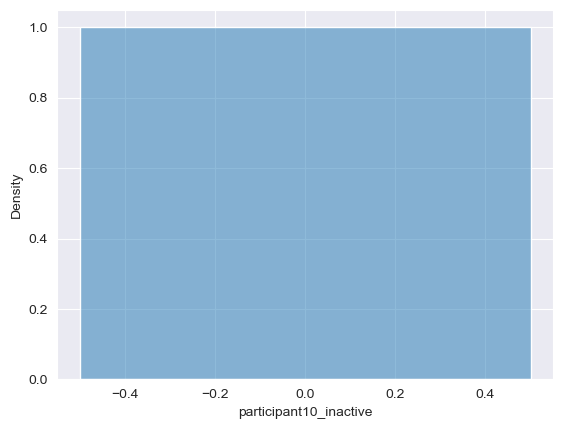

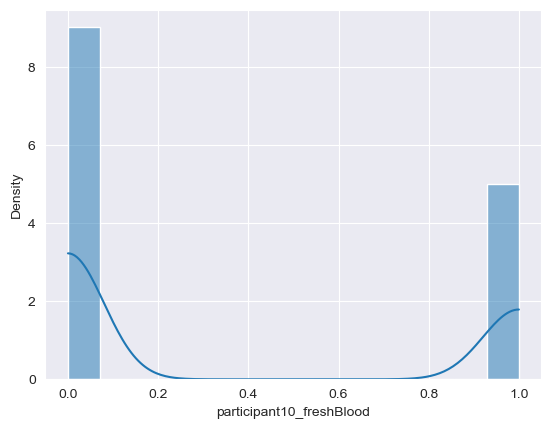

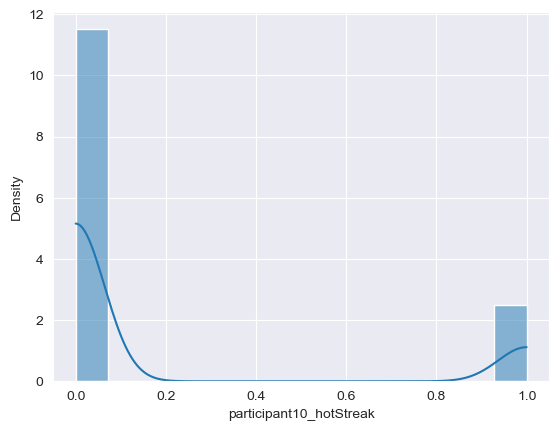

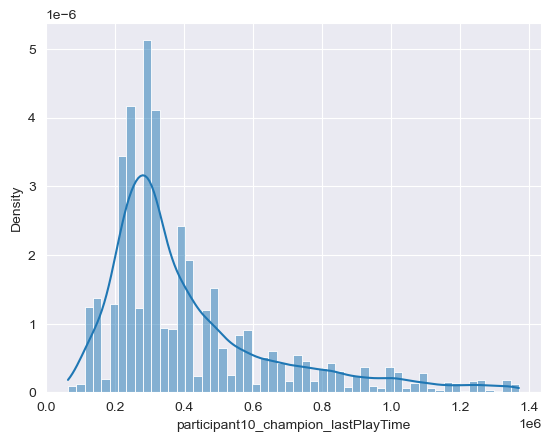

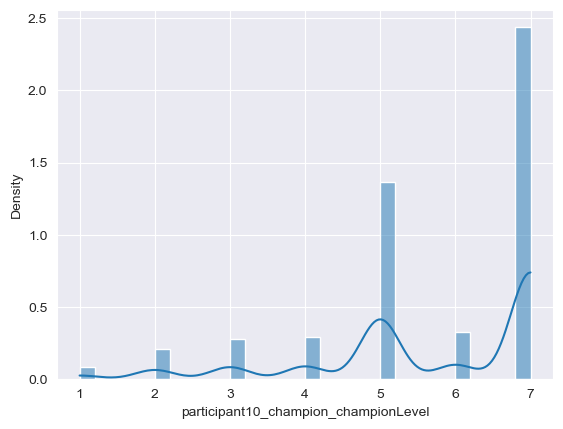

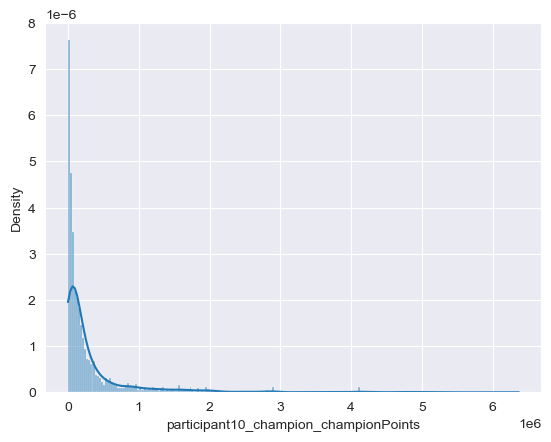

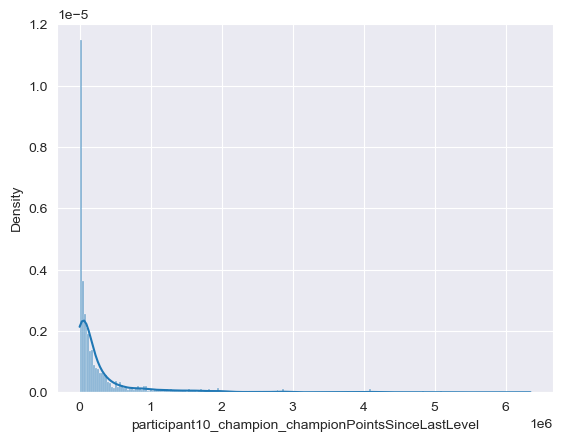

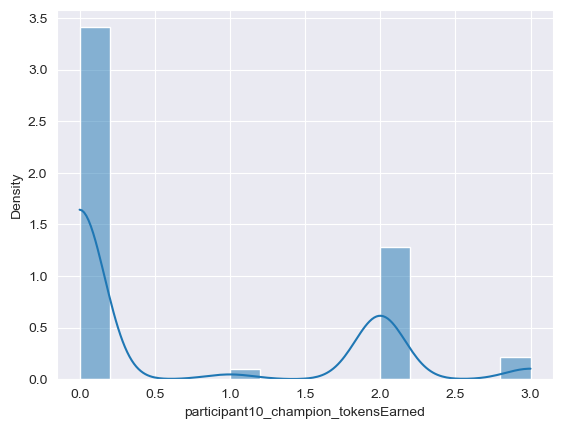

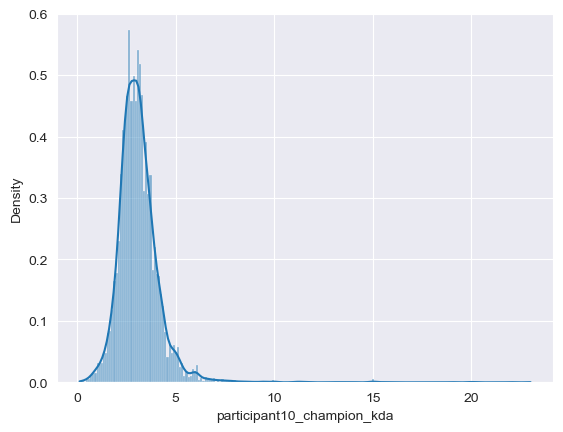

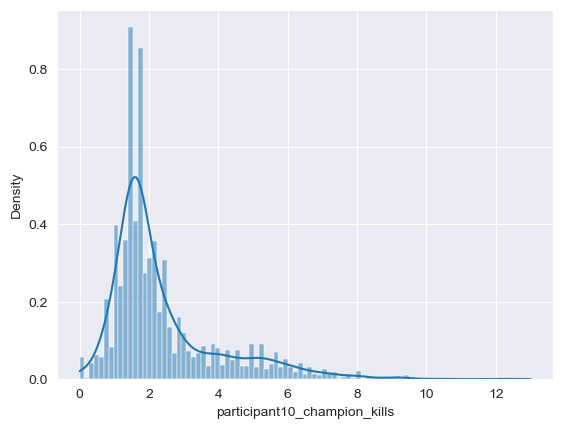

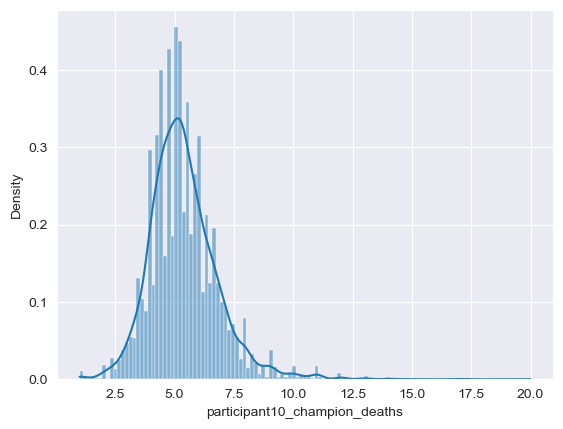

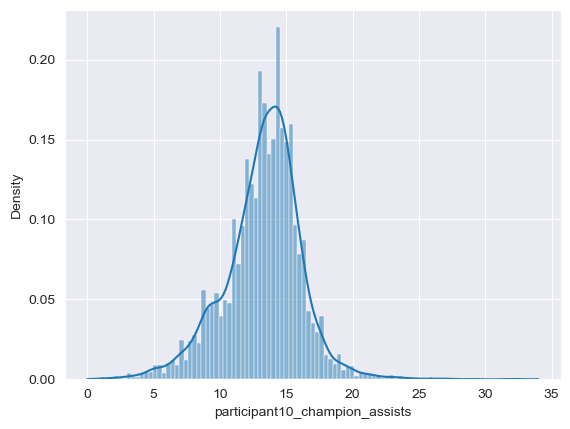

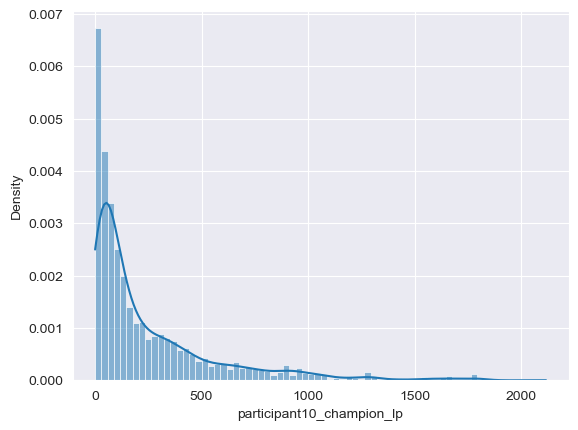

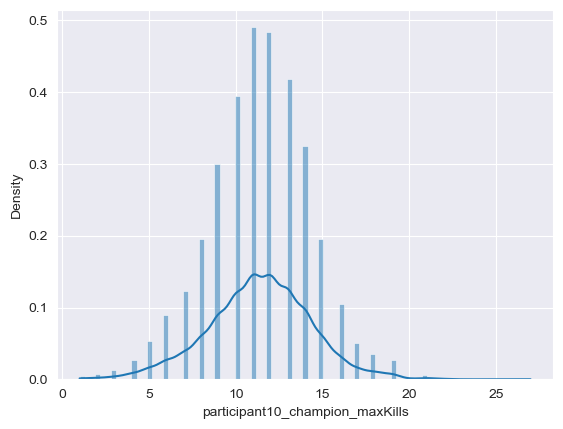

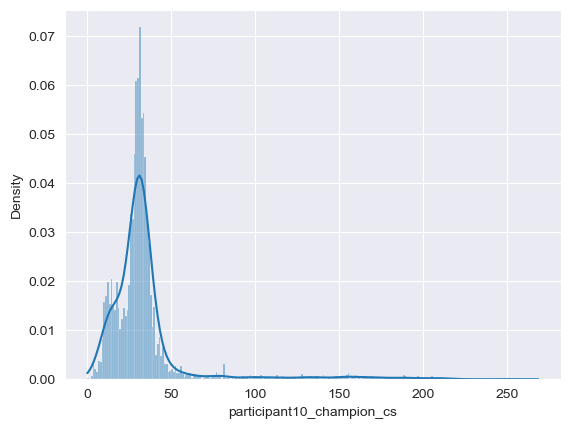

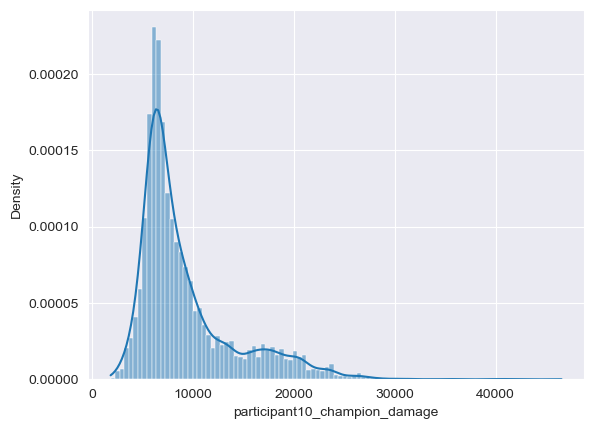

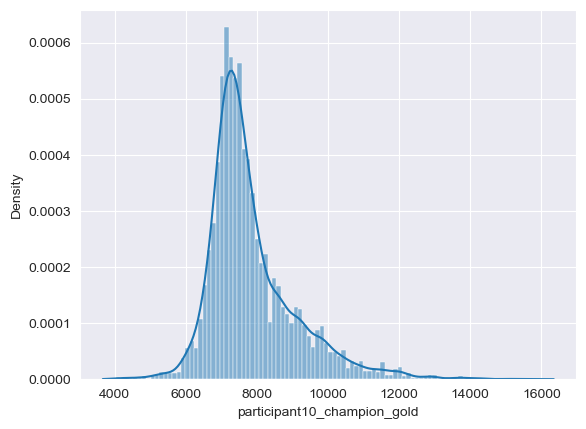

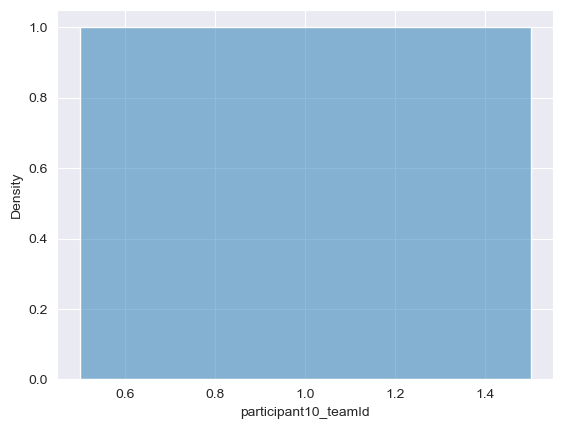

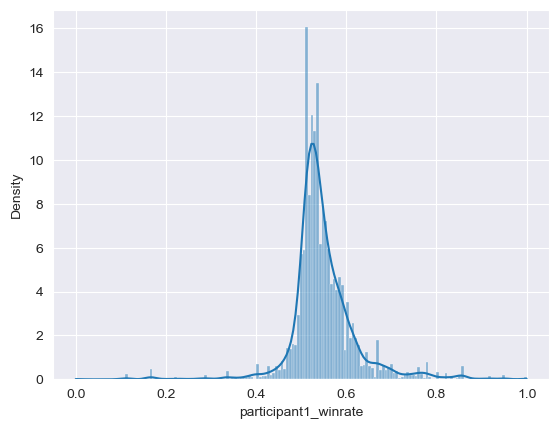

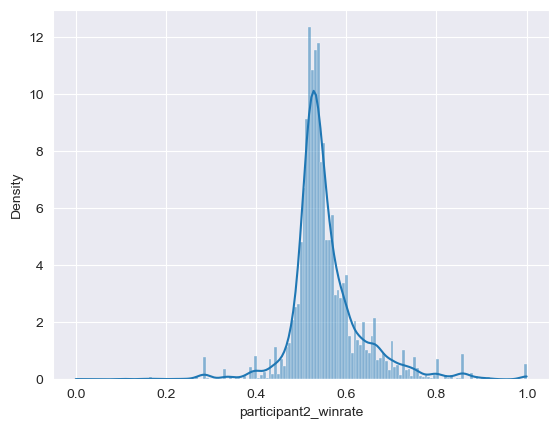

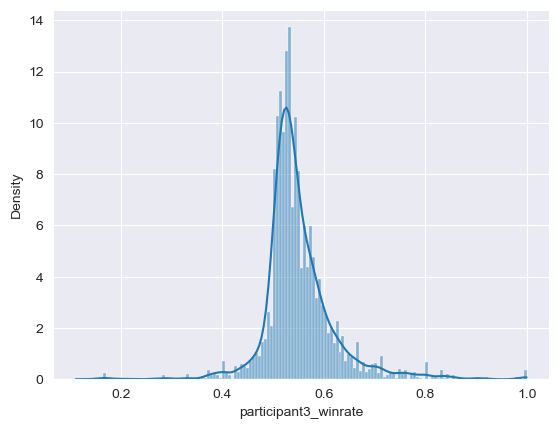

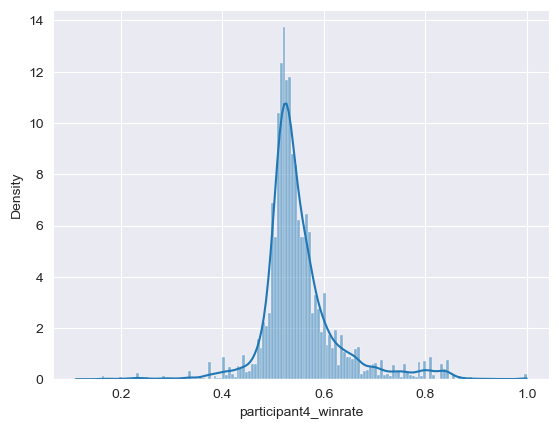

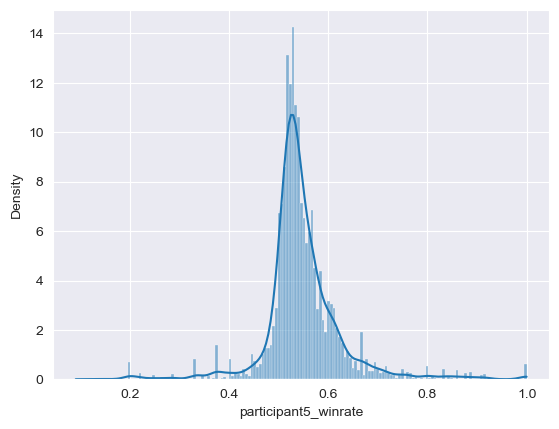

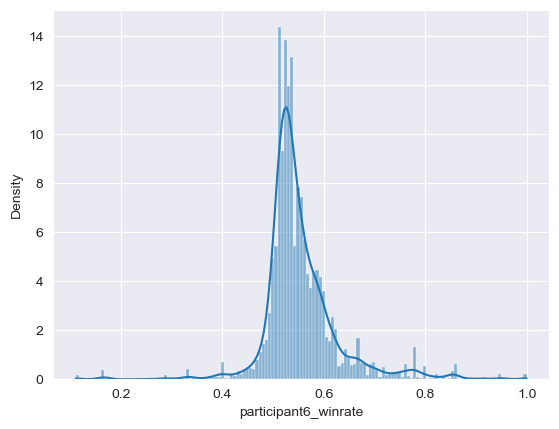

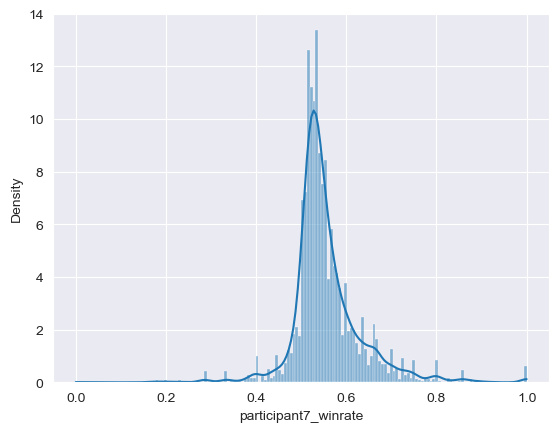

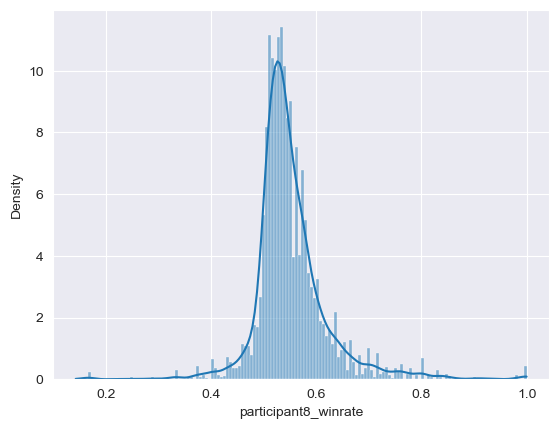

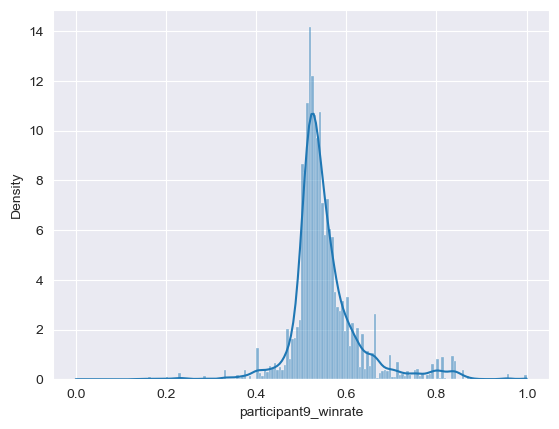

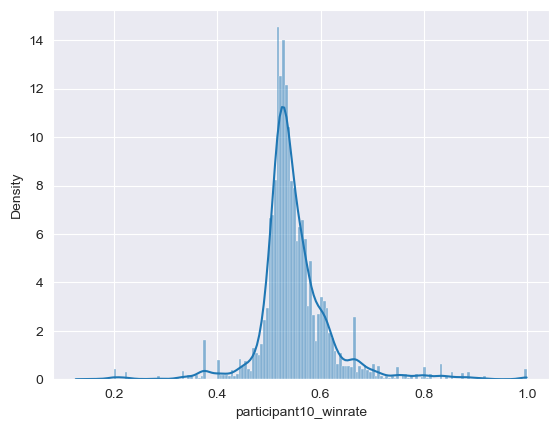

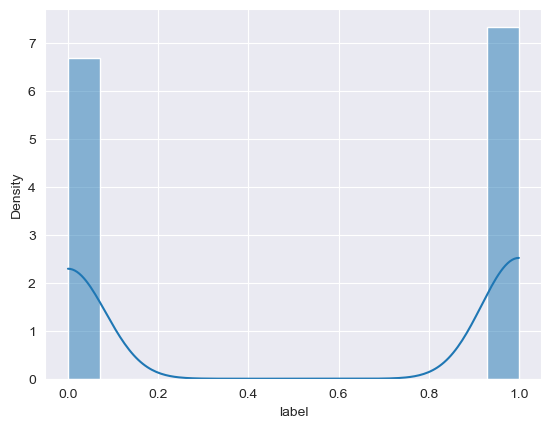

In [41]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col], stat='density', kde=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42,
                                                    shuffle=True)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train = np.append(X_train, np.expand_dims(y_train, axis=1), axis=1)
X_test = np.append(X_test, np.expand_dims(y_test, axis=1), axis=1)

In [45]:
X_train

array([[ 0.07124426,  1.69569358,  2.816647  , ..., -0.14072396,
        -4.704349  ,  0.        ],
       [-0.78967966,  0.86189329,  1.11060504, ..., -0.23564308,
         0.29161518,  1.        ],
       [-1.00329237,  0.028093  , -0.07743078, ..., -0.03540725,
        -0.41676147,  1.        ],
       ...,
       [-0.32037903,  0.028093  ,  0.17594179, ..., -0.42624189,
        -0.33959347,  0.        ],
       [ 0.62469536,  0.86189329,  1.07400678, ..., -0.37231046,
        -0.04908068,  1.        ],
       [ 1.62479119, -0.80570729, -0.95015851, ..., -0.47026284,
        -0.33526521,  0.        ]])

In [46]:
np.shape(np.expand_dims(y_train, axis=1))

(6307, 1)

In [47]:
np.shape(X_train)

(6307, 231)

In [48]:
np.save('../data/train_static', X_train)
np.save('../data/test_static', X_test)